# AI Fundamentals - Assignment 3

This assignment requires you to use [Tensorflow](https://www.tensorflow.org) and [Keras](https://keras.io/). Keras is a high-level Deep Learning API written in Python working as an interface to TensorFlow.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit by uploading this notebook to Canvas. It should include **plots**, **results** and **code** showing how the results were genereated.  Remember to name your file(s) appropriately.
It is due on 11:59 of December 9, 2020.

## Installation
Instructions can be found here:
* [Tensorflow](https://www.tensorflow.org/install/)

Since Tensorflow 2.0, Keras is included in Tensorflow and will be automatically installed with Tensorflow. It can be accessed as ```tensorflow.keras```

I recommend using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this tutorial.

If you're using a virtualenv:
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install tensorflow
```
Make sure that you have ```sklearn```, ```matplotlib``` and ```numpy``` installed, too.


## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

![Side by side loss](https://drive.google.com/uc?id=1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae)
<b>Figure 1.</b> Left: high loss and right: low loss.

<!-- https://drive.google.com/file/d/1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae/view?usp=sharing
<img src="./fig/LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>
 -->
The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariate calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-1000 examples) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it has a momentum and want to keep moving in that direction. It gains momentum by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

![Contours - optimizer comparison](https://drive.google.com/uc?id=1CmrD-UPZ7EIUjRuO_ib7k9CL1FO2bbLk)
<b>Figure 2.</b> Comparison of six different optimizers.


![Saddle point - optimizer comparison](https://drive.google.com/uc?id=1QVhN9rAvCjXtGyNZkmFivyyCzNsntObh)
<b>Figure 3.</b> Comparison of six different optimizers at a saddle point.

<!-- <img src="./fig/contours_evaluation_optimizers.gif" width="500">
<img src="./fig/saddle_point_evaluation_optimizers.gif" width="500"> -->

In [1]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

# Load data from https://www.openml.org/d/554
dataset=fetch_openml('mnist_784')
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]

In [2]:
type(dataset)

sklearn.utils.Bunch

In [3]:
X.shape

(1000, 784)

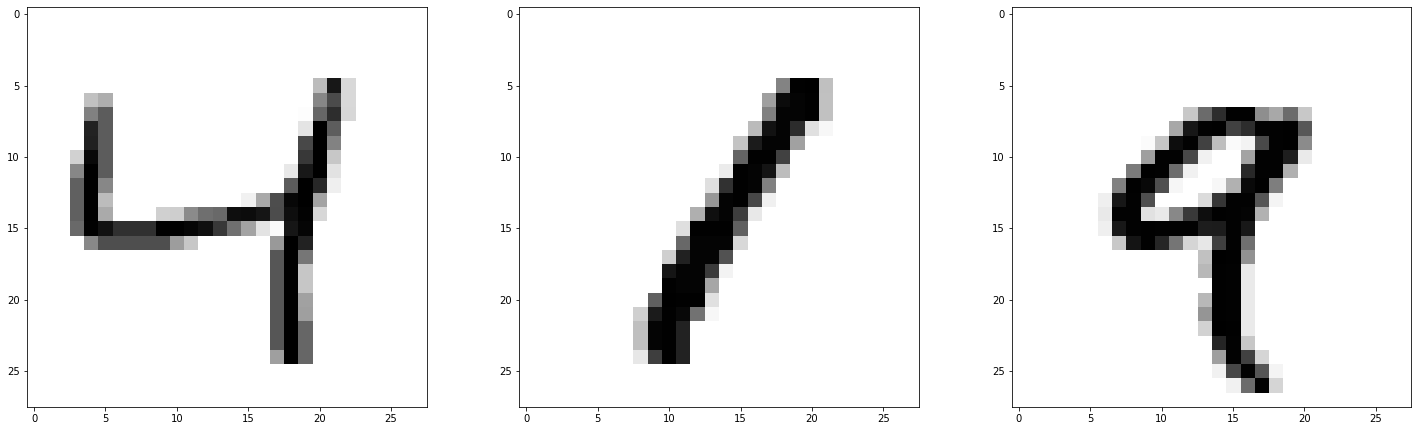

In [4]:
im0=X[2].reshape(28,28)
im1=X[3].reshape(28,28)
im2=X[4].reshape(28,28)
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(331)
ax.imshow(im0,cmap = mpl.cm.binary, interpolation="nearest")
ax = fig.add_subplot(332)
ax.imshow(im1,cmap = mpl.cm.binary, interpolation="nearest")
ax = fig.add_subplot(333)
ax.imshow(im2,cmap = mpl.cm.binary, interpolation="nearest")

In [5]:
y

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2',
       '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7',
       '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0',
       '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4',
       '5', '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1',
       '1', '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6',
       '7', '4', '6', '8', '0', '7', '8', '3', '1', '5', '7', '1', '7',
       '1', '1', '6', '3', '0', '2', '9', '3', '1', '1', '0', '4', '9',
       '2', '0', '0', '2', '0', '2', '7', '1', '8', '6', '4', '1', '6',
       '3', '4', '5', '9', '1', '3', '3', '8', '5', '4', '7', '7', '4',
       '2', '8', '5', '8', '6', '7', '3', '4', '6', '1', '9', '9', '6',
       '0', '3', '7', '2', '8', '2', '9', '4', '4', '6', '4', '9', '7',
       '0', '9', '2', '9', '5', '1', '5', '9', '1', '2', '3', '2

In [6]:
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

X_train, X_validate, y_oh_train, y_oh_validate = train_test_split(X_train, y_oh_train, test_size = 0.2, random_state = 123)

In [7]:
y_oh.shape

(1000, 10)

In [8]:
y.shape

(1000,)

In [9]:
y_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Question 1
**The data set**

Plot a three examples from the data set.
* What type of data are in the data set?

    <span style="color:red"> <*sklearn.utils.Bunch*> </span>
    

* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?
    
    <span style="color:red"> <*The orginal shape is (1000,784). After reshape, it becomes shape (1000,28,28,1). Becasue CNN require the input to be the shape of [batch, in_height, in_width, in_channels]*> </span>

Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
    y_oh = np.zeros((num_tot, num_classes))
    y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```.
* What is the relationship between ```y``` and ```y_oh```?

    <span style="color:red"> <*y just an (1000,0)array that shows each number of the handwriting number. Y_oh is an array of shape(1000,10). For example, the first element in y is 0, but in y_oh the column corresponding to the y is the column 0, so (1000,0)is 1 and column 1-9 is 0*> </span>
    
    
* What is the type of encoding in ```y_oh``` called and why is it used?

    <span style="color:red"> <*Because we are doing CNN for classify hand written numeric number from 0-9 to their true number
highlight the highest values while suppress the other lowest values. 
the Softmax activation function can also be understood as normalising the output to [0,1], ie, find the highest probability
Converts the score array to perfect probabilities
we need use an array of y input to do the softmax function, so we have to use one hot encoder to cover y array to a matrix of 0 and 1
since our target is one hot encoded y(y_oh)*> </span>
    
    
* Plot three data examples in the same figure and set the correct label as title. 
    * It should be possible to see what the data represent.

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?

    <span style="color:red"> <*CNN*> </span>
    
    
* What does ```Dropout()``` do?

    <span style="color:red"> <*Dropout’s purpose is to help your network generalize and not overfit. Neurons from the current layer, with probability p, will randomly disconnect from neurons in the next layer so that the network has to rely on the existing connections.*> </span>


* Which type of activation function is used for the hidden layers?

    <span style="color:red"> <*relu*> </span>


* Which type of activation function is used for the output layer?

    <span style="color:red"> <*softmax*> </span>


* Why are two different activation functions used?

    <span style="color:red"> <*relu finction is used to make a stack of images become a stack of images with no negative value softmax function is an activation function used to make linear input into nonlinear output and can be used into classification which has more than two classes*> </span>


* What optimizer is used in the model below?

    <span style="color:red"> <*stochastic gradient descent*> </span>


* How often are the weights updated (i.e. after how many data examples)?

    <span style="color:red"> <*every 32 data examples*> </span>


* What loss function is used?

    <span style="color:red"> <*categorical_crossentropy*> </span>


* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?

    <span style="color:red"> <*model.summary(), Total params: 108,618*> </span>


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#'optimizer': ['adam','rmsprop','sgd'] First check sgd
def CNN1(epochs,dropout):
    model1 = Sequential()
    model1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(dropout))
    model1.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Flatten())
    model1.add(Dense(128, activation='relu'))
    model1.add(Dropout(dropout))
    model1.add(Dense(10, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    # Compile the model
    model1.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=["accuracy"])
    return model1

In [25]:

classifier1 = KerasClassifier(build_fn = CNN1)
parameters1 = {'epochs': [80,150],'dropout':[0,0.15,0.25]}
grid_search1 = GridSearchCV(estimator = classifier1,param_grid = parameters1)
grid_search1 = grid_search1.fit(X_train,y_oh_train,validation_data = (X_validate,y_oh_validate))

best_parameters1= grid_search1.best_params_

Epoch 1/80
16/16 [==============================] - 0s 15ms/step - loss: 2.2900 - accuracy: 0.1504 - val_loss: 2.2592 - val_accuracy: 0.1937
Epoch 2/80
16/16 [==============================] - 0s 7ms/step - loss: 2.2489 - accuracy: 0.2227 - val_loss: 2.2262 - val_accuracy: 0.3250
Epoch 3/80
16/16 [==============================] - 0s 7ms/step - loss: 2.2074 - accuracy: 0.3086 - val_loss: 2.1897 - val_accuracy: 0.4000
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 2.1608 - accuracy: 0.3867 - val_loss: 2.1460 - val_accuracy: 0.4062
Epoch 5/80
16/16 [==============================] - 0s 7ms/step - loss: 2.1052 - accuracy: 0.4219 - val_loss: 2.0850 - val_accuracy: 0.5000
Epoch 6/80
16/16 [==============================] - 0s 7ms/step - loss: 2.0293 - accuracy: 0.5117 - val_loss: 2.0096 - val_accuracy: 0.5437
Epoch 7/80
16/16 [==============================] - 0s 7ms/step - loss: 1.9288 - accuracy: 0.5684 - val_loss: 1.8921 - val_accuracy: 0.6000
Epoch 8/80
16/16 [=

16/16 [==============================] - 0s 7ms/step - loss: 0.1044 - accuracy: 0.9688 - val_loss: 0.4493 - val_accuracy: 0.8938
Epoch 60/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1051 - accuracy: 0.9668 - val_loss: 0.4288 - val_accuracy: 0.8687
Epoch 61/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0987 - accuracy: 0.9824 - val_loss: 0.4518 - val_accuracy: 0.8562
Epoch 62/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0954 - accuracy: 0.9746 - val_loss: 0.4465 - val_accuracy: 0.8813
Epoch 63/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0864 - accuracy: 0.9863 - val_loss: 0.4561 - val_accuracy: 0.8938
Epoch 64/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0868 - accuracy: 0.9844 - val_loss: 0.4901 - val_accuracy: 0.8625
Epoch 65/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0897 - accuracy: 0.9785 - val_loss: 0.4807 - val_accuracy: 0.8687
Epoch 66/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.2524 - accuracy: 0.9355 - val_loss: 0.4832 - val_accuracy: 0.8813
Epoch 37/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2481 - accuracy: 0.9121 - val_loss: 0.4785 - val_accuracy: 0.8750
Epoch 38/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2408 - accuracy: 0.9297 - val_loss: 0.4912 - val_accuracy: 0.8562
Epoch 39/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2274 - accuracy: 0.9297 - val_loss: 0.4740 - val_accuracy: 0.8813
Epoch 40/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2177 - accuracy: 0.9434 - val_loss: 0.5851 - val_accuracy: 0.8250
Epoch 41/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2172 - accuracy: 0.9297 - val_loss: 0.5563 - val_accuracy: 0.8125
Epoch 42/80
16/16 [==============================] - 0s 6ms/step - loss: 0.2066 - accuracy: 0.9414 - val_loss: 0.4759 - val_accuracy: 0.8750
Epoch 43/80
16/16 [======

16/16 [==============================] - 0s 6ms/step - loss: 1.6783 - accuracy: 0.6660 - val_loss: 1.6361 - val_accuracy: 0.6875
Epoch 14/80
16/16 [==============================] - 0s 7ms/step - loss: 1.4796 - accuracy: 0.7031 - val_loss: 1.4329 - val_accuracy: 0.7375
Epoch 15/80
16/16 [==============================] - 0s 7ms/step - loss: 1.2519 - accuracy: 0.7715 - val_loss: 1.1893 - val_accuracy: 0.7688
Epoch 16/80
16/16 [==============================] - 0s 6ms/step - loss: 1.0353 - accuracy: 0.7773 - val_loss: 1.0305 - val_accuracy: 0.7812
Epoch 17/80
16/16 [==============================] - 0s 6ms/step - loss: 0.8624 - accuracy: 0.8008 - val_loss: 0.8868 - val_accuracy: 0.8062
Epoch 18/80
16/16 [==============================] - 0s 6ms/step - loss: 0.7311 - accuracy: 0.8340 - val_loss: 0.8106 - val_accuracy: 0.8000
Epoch 19/80
16/16 [==============================] - 0s 6ms/step - loss: 0.6443 - accuracy: 0.8359 - val_loss: 0.7148 - val_accuracy: 0.8250
Epoch 20/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0797 - accuracy: 0.9824 - val_loss: 0.4324 - val_accuracy: 0.8875
Epoch 72/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0720 - accuracy: 0.9844 - val_loss: 0.3844 - val_accuracy: 0.8875
Epoch 73/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0689 - accuracy: 0.9883 - val_loss: 0.3998 - val_accuracy: 0.8938
Epoch 74/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0647 - accuracy: 0.9902 - val_loss: 0.3884 - val_accuracy: 0.9062
Epoch 75/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0624 - accuracy: 0.9883 - val_loss: 0.4247 - val_accuracy: 0.9000
Epoch 76/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0614 - accuracy: 0.9883 - val_loss: 0.4005 - val_accuracy: 0.9000
Epoch 77/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0573 - accuracy: 0.9883 - val_loss: 0.3985 - val_accuracy: 0.9062
Epoch 78/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.2179 - accuracy: 0.9336 - val_loss: 0.4214 - val_accuracy: 0.8813
Epoch 49/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2216 - accuracy: 0.9355 - val_loss: 0.4484 - val_accuracy: 0.8750
Epoch 50/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2158 - accuracy: 0.9277 - val_loss: 0.3980 - val_accuracy: 0.9062
Epoch 51/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1990 - accuracy: 0.9434 - val_loss: 0.4549 - val_accuracy: 0.8938
Epoch 52/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1868 - accuracy: 0.9395 - val_loss: 0.4296 - val_accuracy: 0.9000
Epoch 53/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.9453 - val_loss: 0.4093 - val_accuracy: 0.8750
Epoch 54/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1807 - accuracy: 0.9531 - val_loss: 0.4133 - val_accuracy: 0.9125
Epoch 55/80
16/16 [======

16/16 [==============================] - 0s 6ms/step - loss: 0.5070 - accuracy: 0.8477 - val_loss: 0.6505 - val_accuracy: 0.8313
Epoch 26/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4800 - accuracy: 0.8691 - val_loss: 0.5986 - val_accuracy: 0.8438
Epoch 27/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4584 - accuracy: 0.8711 - val_loss: 0.5816 - val_accuracy: 0.8687
Epoch 28/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4294 - accuracy: 0.8770 - val_loss: 0.6411 - val_accuracy: 0.7812
Epoch 29/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4176 - accuracy: 0.8906 - val_loss: 0.5396 - val_accuracy: 0.8562
Epoch 30/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4065 - accuracy: 0.8789 - val_loss: 0.5458 - val_accuracy: 0.8125
Epoch 31/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3744 - accuracy: 0.8926 - val_loss: 0.5373 - val_accuracy: 0.8500
Epoch 32/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 2.2608 - accuracy: 0.1406 - val_loss: 2.2257 - val_accuracy: 0.2688
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2238 - accuracy: 0.2910 - val_loss: 2.1977 - val_accuracy: 0.3562
Epoch 4/150
16/16 [==============================] - 0s 6ms/step - loss: 2.1808 - accuracy: 0.3828 - val_loss: 2.1599 - val_accuracy: 0.4500
Epoch 5/150
16/16 [==============================] - 0s 6ms/step - loss: 2.1296 - accuracy: 0.4141 - val_loss: 2.1082 - val_accuracy: 0.4938
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - loss: 2.0594 - accuracy: 0.4629 - val_loss: 2.0396 - val_accuracy: 0.5250
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 1.9630 - accuracy: 0.5391 - val_loss: 1.9313 - val_accuracy: 0.5813
Epoch 8/150
16/16 [==============================] - 0s 7ms/step - loss: 1.8308 - accuracy: 0.5996 - val_loss: 1.7807 - val_accuracy: 0.6313
Epoch 9/150
16/16 [======

Epoch 60/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0999 - accuracy: 0.9746 - val_loss: 0.4753 - val_accuracy: 0.8750
Epoch 61/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1041 - accuracy: 0.9766 - val_loss: 0.4996 - val_accuracy: 0.8500
Epoch 62/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1023 - accuracy: 0.9766 - val_loss: 0.4684 - val_accuracy: 0.8625
Epoch 63/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0880 - accuracy: 0.9844 - val_loss: 0.5190 - val_accuracy: 0.8625
Epoch 64/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0878 - accuracy: 0.9766 - val_loss: 0.5408 - val_accuracy: 0.8375
Epoch 65/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0918 - accuracy: 0.9805 - val_loss: 0.5060 - val_accuracy: 0.8500
Epoch 66/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0905 - accuracy: 0.9805 - val_loss: 0.5301 - val_accuracy: 0.8500
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0195 - accuracy: 0.9980 - val_loss: 0.5428 - val_accuracy: 0.8500
Epoch 118/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.5315 - val_accuracy: 0.8687
Epoch 119/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.5213 - val_accuracy: 0.8625
Epoch 120/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.5390 - val_accuracy: 0.8687
Epoch 121/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.5516 - val_accuracy: 0.8500
Epoch 122/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.5273 - val_accuracy: 0.8687
Epoch 123/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.5548 - val_accuracy: 0.8625
Epoch 124/150

16/16 [==============================] - 0s 7ms/step - loss: 0.4358 - accuracy: 0.8789 - val_loss: 0.5520 - val_accuracy: 0.8562
Epoch 25/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4011 - accuracy: 0.9043 - val_loss: 0.5684 - val_accuracy: 0.8250
Epoch 26/150
16/16 [==============================] - 0s 6ms/step - loss: 0.4006 - accuracy: 0.8867 - val_loss: 0.6198 - val_accuracy: 0.8125
Epoch 27/150
16/16 [==============================] - 0s 6ms/step - loss: 0.3868 - accuracy: 0.8828 - val_loss: 0.5496 - val_accuracy: 0.8438
Epoch 28/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3660 - accuracy: 0.9102 - val_loss: 0.5485 - val_accuracy: 0.8375
Epoch 29/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3460 - accuracy: 0.9062 - val_loss: 0.5495 - val_accuracy: 0.8625
Epoch 30/150
16/16 [==============================] - 0s 6ms/step - loss: 0.3255 - accuracy: 0.9121 - val_loss: 0.4792 - val_accuracy: 0.8500
Epoch 31/150
16/16 

Epoch 82/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0635 - accuracy: 0.9883 - val_loss: 0.4194 - val_accuracy: 0.9000
Epoch 83/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0599 - accuracy: 0.9863 - val_loss: 0.4641 - val_accuracy: 0.8875
Epoch 84/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9922 - val_loss: 0.4077 - val_accuracy: 0.8875
Epoch 85/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0581 - accuracy: 0.9902 - val_loss: 0.3906 - val_accuracy: 0.9000
Epoch 86/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0609 - accuracy: 0.9883 - val_loss: 0.4133 - val_accuracy: 0.9125
Epoch 87/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0523 - accuracy: 0.9941 - val_loss: 0.4413 - val_accuracy: 0.9000
Epoch 88/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0556 - accuracy: 0.9883 - val_loss: 0.4075 - val_accuracy: 0.9062
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.4814 - val_accuracy: 0.9062
Epoch 140/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.4809 - val_accuracy: 0.9000
Epoch 141/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.4608 - val_accuracy: 0.9125
Epoch 142/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.4898 - val_accuracy: 0.9000
Epoch 143/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.4778 - val_accuracy: 0.9000
Epoch 144/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.4891 - val_accuracy: 0.9000
Epoch 145/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.4842 - val_accuracy: 0.9062
Epoch 146/150

16/16 [==============================] - 0s 7ms/step - loss: 0.1950 - accuracy: 0.9473 - val_loss: 0.4799 - val_accuracy: 0.8813
Epoch 47/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2052 - accuracy: 0.9492 - val_loss: 0.5014 - val_accuracy: 0.8500
Epoch 48/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1905 - accuracy: 0.9453 - val_loss: 0.4717 - val_accuracy: 0.8500
Epoch 49/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1847 - accuracy: 0.9570 - val_loss: 0.5171 - val_accuracy: 0.8438
Epoch 50/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1931 - accuracy: 0.9512 - val_loss: 0.4568 - val_accuracy: 0.8562
Epoch 51/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1759 - accuracy: 0.9551 - val_loss: 0.4880 - val_accuracy: 0.8875
Epoch 52/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1705 - accuracy: 0.9551 - val_loss: 0.4797 - val_accuracy: 0.8625
Epoch 53/150
16/16 

Epoch 104/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.4656 - val_accuracy: 0.8875
Epoch 105/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.4779 - val_accuracy: 0.8875
Epoch 106/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.4856 - val_accuracy: 0.8875
Epoch 107/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9980 - val_loss: 0.4757 - val_accuracy: 0.8938
Epoch 108/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 0.4758 - val_accuracy: 0.8938
Epoch 109/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.4745 - val_accuracy: 0.8875
Epoch 110/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.4720 - val_accuracy: 0.8875

Epoch 11/150
16/16 [==============================] - 0s 7ms/step - loss: 1.4744 - accuracy: 0.6797 - val_loss: 1.4322 - val_accuracy: 0.6562
Epoch 12/150
16/16 [==============================] - 0s 7ms/step - loss: 1.2617 - accuracy: 0.7285 - val_loss: 1.2625 - val_accuracy: 0.6812
Epoch 13/150
16/16 [==============================] - 0s 6ms/step - loss: 1.0710 - accuracy: 0.7832 - val_loss: 1.1083 - val_accuracy: 0.7000
Epoch 14/150
16/16 [==============================] - 0s 6ms/step - loss: 0.9081 - accuracy: 0.7930 - val_loss: 0.9705 - val_accuracy: 0.7375
Epoch 15/150
16/16 [==============================] - 0s 7ms/step - loss: 0.8058 - accuracy: 0.7969 - val_loss: 0.8602 - val_accuracy: 0.7437
Epoch 16/150
16/16 [==============================] - 0s 6ms/step - loss: 0.7099 - accuracy: 0.8164 - val_loss: 0.8110 - val_accuracy: 0.7812
Epoch 17/150
16/16 [==============================] - 0s 6ms/step - loss: 0.6522 - accuracy: 0.8242 - val_loss: 0.7412 - val_accuracy: 0.8062
Epoch 

Epoch 69/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0796 - accuracy: 0.9805 - val_loss: 0.4027 - val_accuracy: 0.8938
Epoch 70/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0810 - accuracy: 0.9863 - val_loss: 0.3952 - val_accuracy: 0.9125
Epoch 71/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0885 - accuracy: 0.9785 - val_loss: 0.5594 - val_accuracy: 0.8250
Epoch 72/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0899 - accuracy: 0.9824 - val_loss: 0.4124 - val_accuracy: 0.8938
Epoch 73/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0707 - accuracy: 0.9883 - val_loss: 0.4113 - val_accuracy: 0.9062
Epoch 74/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0689 - accuracy: 0.9883 - val_loss: 0.3920 - val_accuracy: 0.9125
Epoch 75/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0657 - accuracy: 0.9902 - val_loss: 0.3903 - val_accuracy: 0.9000
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.4404 - val_accuracy: 0.9125
Epoch 127/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.4418 - val_accuracy: 0.9125
Epoch 128/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.4638 - val_accuracy: 0.9062
Epoch 129/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.4465 - val_accuracy: 0.9187
Epoch 130/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.4588 - val_accuracy: 0.9125
Epoch 131/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.4528 - val_accuracy: 0.9125
Epoch 132/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.4494 - val_accuracy: 0.9125
Epoch 133/150

16/16 [==============================] - 0s 6ms/step - loss: 0.3570 - accuracy: 0.8965 - val_loss: 0.5303 - val_accuracy: 0.8562
Epoch 34/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3376 - accuracy: 0.8945 - val_loss: 0.5795 - val_accuracy: 0.8250
Epoch 35/150
16/16 [==============================] - 0s 6ms/step - loss: 0.4155 - accuracy: 0.8613 - val_loss: 0.4711 - val_accuracy: 0.8938
Epoch 36/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3119 - accuracy: 0.9043 - val_loss: 0.4997 - val_accuracy: 0.8687
Epoch 37/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3060 - accuracy: 0.9180 - val_loss: 0.4715 - val_accuracy: 0.8750
Epoch 38/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2964 - accuracy: 0.9219 - val_loss: 0.5013 - val_accuracy: 0.8562
Epoch 39/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2896 - accuracy: 0.9121 - val_loss: 0.4834 - val_accuracy: 0.8750
Epoch 40/150
16/16 

Epoch 91/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0438 - accuracy: 0.9961 - val_loss: 0.3872 - val_accuracy: 0.9000
Epoch 92/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0435 - accuracy: 0.9980 - val_loss: 0.4117 - val_accuracy: 0.9062
Epoch 93/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0402 - accuracy: 0.9980 - val_loss: 0.3840 - val_accuracy: 0.9312
Epoch 94/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0400 - accuracy: 0.9980 - val_loss: 0.3725 - val_accuracy: 0.9250
Epoch 95/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 0.3724 - val_accuracy: 0.9250
Epoch 96/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9980 - val_loss: 0.3950 - val_accuracy: 0.9250
Epoch 97/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.3592 - val_accuracy: 0.9312
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.4122 - val_accuracy: 0.9312
Epoch 149/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.4050 - val_accuracy: 0.9250
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.9375
Epoch 1/80
16/16 [==============================] - 0s 13ms/step - loss: 2.3247 - accuracy: 0.0840 - val_loss: 2.2907 - val_accuracy: 0.1562
Epoch 2/80
16/16 [==============================] - 0s 8ms/step - loss: 2.2983 - accuracy: 0.1113 - val_loss: 2.2736 - val_accuracy: 0.2125
Epoch 3/80
16/16 [==============================] - 0s 7ms/step - loss: 2.2778 - accuracy: 0.1602 - val_loss: 2.2588 - val_accuracy: 0.3125
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 2.2564 - accuracy: 0.2109 - val_loss: 2.2405 - val_accuracy: 0.3375
Epoch 5/80
16/16 [==============================] - 0s 6ms/step - lo

16/16 [==============================] - 0s 7ms/step - loss: 0.2875 - accuracy: 0.9004 - val_loss: 0.3870 - val_accuracy: 0.8875
Epoch 56/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2436 - accuracy: 0.9375 - val_loss: 0.3478 - val_accuracy: 0.8938
Epoch 57/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2704 - accuracy: 0.9062 - val_loss: 0.3582 - val_accuracy: 0.9000
Epoch 58/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2427 - accuracy: 0.9336 - val_loss: 0.3725 - val_accuracy: 0.8938
Epoch 59/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2366 - accuracy: 0.9199 - val_loss: 0.3552 - val_accuracy: 0.9062
Epoch 60/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2431 - accuracy: 0.9043 - val_loss: 0.3680 - val_accuracy: 0.9000
Epoch 61/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2388 - accuracy: 0.9141 - val_loss: 0.3481 - val_accuracy: 0.9062
Epoch 62/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.4555 - accuracy: 0.8594 - val_loss: 0.5051 - val_accuracy: 0.8750
Epoch 33/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4370 - accuracy: 0.8770 - val_loss: 0.4936 - val_accuracy: 0.8687
Epoch 34/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4213 - accuracy: 0.8750 - val_loss: 0.4640 - val_accuracy: 0.8875
Epoch 35/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8867 - val_loss: 0.4755 - val_accuracy: 0.8813
Epoch 36/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3850 - accuracy: 0.8770 - val_loss: 0.4540 - val_accuracy: 0.8750
Epoch 37/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3659 - accuracy: 0.8848 - val_loss: 0.4684 - val_accuracy: 0.8813
Epoch 38/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3774 - accuracy: 0.8887 - val_loss: 0.4601 - val_accuracy: 0.8750
Epoch 39/80
16/16 [======

16/16 [==============================] - 0s 6ms/step - loss: 1.9958 - accuracy: 0.4199 - val_loss: 1.9774 - val_accuracy: 0.5188
Epoch 10/80
16/16 [==============================] - 0s 7ms/step - loss: 1.8890 - accuracy: 0.4863 - val_loss: 1.8559 - val_accuracy: 0.5875
Epoch 11/80
16/16 [==============================] - 0s 7ms/step - loss: 1.7510 - accuracy: 0.5664 - val_loss: 1.6897 - val_accuracy: 0.6625
Epoch 12/80
16/16 [==============================] - 0s 7ms/step - loss: 1.5592 - accuracy: 0.6074 - val_loss: 1.5397 - val_accuracy: 0.6313
Epoch 13/80
16/16 [==============================] - 0s 7ms/step - loss: 1.3896 - accuracy: 0.6328 - val_loss: 1.3167 - val_accuracy: 0.7250
Epoch 14/80
16/16 [==============================] - 0s 7ms/step - loss: 1.2192 - accuracy: 0.6758 - val_loss: 1.1589 - val_accuracy: 0.7437
Epoch 15/80
16/16 [==============================] - 0s 7ms/step - loss: 1.0684 - accuracy: 0.7051 - val_loss: 1.0039 - val_accuracy: 0.7437
Epoch 16/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.1571 - accuracy: 0.9512 - val_loss: 0.3565 - val_accuracy: 0.8875
Epoch 68/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1532 - accuracy: 0.9570 - val_loss: 0.3851 - val_accuracy: 0.8938
Epoch 69/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1522 - accuracy: 0.9648 - val_loss: 0.3407 - val_accuracy: 0.8938
Epoch 70/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1780 - accuracy: 0.9395 - val_loss: 0.3404 - val_accuracy: 0.8938
Epoch 71/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1680 - accuracy: 0.9551 - val_loss: 0.3397 - val_accuracy: 0.8938
Epoch 72/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1546 - accuracy: 0.9551 - val_loss: 0.3778 - val_accuracy: 0.8750
Epoch 73/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1491 - accuracy: 0.9570 - val_loss: 0.3598 - val_accuracy: 0.8875
Epoch 74/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.3214 - accuracy: 0.9082 - val_loss: 0.4072 - val_accuracy: 0.8750
Epoch 45/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3099 - accuracy: 0.9121 - val_loss: 0.3657 - val_accuracy: 0.8875
Epoch 46/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3007 - accuracy: 0.9219 - val_loss: 0.3612 - val_accuracy: 0.9062
Epoch 47/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3140 - accuracy: 0.9121 - val_loss: 0.3785 - val_accuracy: 0.9000
Epoch 48/80
16/16 [==============================] - 0s 6ms/step - loss: 0.2656 - accuracy: 0.9336 - val_loss: 0.3539 - val_accuracy: 0.9125
Epoch 49/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3687 - val_accuracy: 0.8875
Epoch 50/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2571 - accuracy: 0.9297 - val_loss: 0.3613 - val_accuracy: 0.9000
Epoch 51/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.7109 - accuracy: 0.7637 - val_loss: 0.6972 - val_accuracy: 0.8250
Epoch 22/80
16/16 [==============================] - 0s 7ms/step - loss: 0.6453 - accuracy: 0.7988 - val_loss: 0.6481 - val_accuracy: 0.8125
Epoch 23/80
16/16 [==============================] - 0s 7ms/step - loss: 0.6205 - accuracy: 0.8164 - val_loss: 0.6173 - val_accuracy: 0.8313
Epoch 24/80
16/16 [==============================] - 0s 7ms/step - loss: 0.6265 - accuracy: 0.8008 - val_loss: 0.6450 - val_accuracy: 0.8438
Epoch 25/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5528 - accuracy: 0.8320 - val_loss: 0.6022 - val_accuracy: 0.8250
Epoch 26/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5081 - accuracy: 0.8359 - val_loss: 0.5624 - val_accuracy: 0.8562
Epoch 27/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5268 - accuracy: 0.8223 - val_loss: 0.5584 - val_accuracy: 0.8562
Epoch 28/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.1556 - accuracy: 0.9453 - val_loss: 0.3631 - val_accuracy: 0.9000
Epoch 80/80
4/4 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.9375
Epoch 1/150
16/16 [==============================] - 0s 13ms/step - loss: 2.2949 - accuracy: 0.1895 - val_loss: 2.2899 - val_accuracy: 0.2500
Epoch 2/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2844 - accuracy: 0.1875 - val_loss: 2.2794 - val_accuracy: 0.2875
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2714 - accuracy: 0.2383 - val_loss: 2.2683 - val_accuracy: 0.3187
Epoch 4/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2557 - accuracy: 0.2656 - val_loss: 2.2552 - val_accuracy: 0.3562
Epoch 5/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2445 - accuracy: 0.2500 - val_loss: 2.2409 - val_accuracy: 0.3438
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - l

16/16 [==============================] - 0s 7ms/step - loss: 0.2895 - accuracy: 0.9004 - val_loss: 0.4153 - val_accuracy: 0.8562
Epoch 57/150
16/16 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.9395 - val_loss: 0.3958 - val_accuracy: 0.9000
Epoch 58/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2429 - accuracy: 0.9199 - val_loss: 0.4245 - val_accuracy: 0.8562
Epoch 59/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2411 - accuracy: 0.9102 - val_loss: 0.4274 - val_accuracy: 0.8500
Epoch 60/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2348 - accuracy: 0.9102 - val_loss: 0.4259 - val_accuracy: 0.8625
Epoch 61/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2172 - accuracy: 0.9219 - val_loss: 0.4127 - val_accuracy: 0.8750
Epoch 62/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2480 - accuracy: 0.9297 - val_loss: 0.3981 - val_accuracy: 0.8750
Epoch 63/150
16/16 

Epoch 114/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0761 - accuracy: 0.9824 - val_loss: 0.3587 - val_accuracy: 0.9187
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0925 - accuracy: 0.9668 - val_loss: 0.3687 - val_accuracy: 0.8938
Epoch 116/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1000 - accuracy: 0.9707 - val_loss: 0.3643 - val_accuracy: 0.8938
Epoch 117/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0730 - accuracy: 0.9844 - val_loss: 0.3592 - val_accuracy: 0.9000
Epoch 118/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0762 - accuracy: 0.9785 - val_loss: 0.3523 - val_accuracy: 0.9250
Epoch 119/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0706 - accuracy: 0.9844 - val_loss: 0.3672 - val_accuracy: 0.9125
Epoch 120/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0800 - accuracy: 0.9785 - val_loss: 0.3959 - val_accuracy: 0.9187

Epoch 21/150
16/16 [==============================] - 0s 7ms/step - loss: 0.6095 - accuracy: 0.8223 - val_loss: 0.6226 - val_accuracy: 0.8188
Epoch 22/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5905 - accuracy: 0.8105 - val_loss: 0.6026 - val_accuracy: 0.8500
Epoch 23/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5583 - accuracy: 0.8301 - val_loss: 0.5688 - val_accuracy: 0.8313
Epoch 24/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5645 - accuracy: 0.8281 - val_loss: 0.5775 - val_accuracy: 0.8313
Epoch 25/150
16/16 [==============================] - 0s 6ms/step - loss: 0.5004 - accuracy: 0.8535 - val_loss: 0.5440 - val_accuracy: 0.8562
Epoch 26/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4966 - accuracy: 0.8535 - val_loss: 0.5574 - val_accuracy: 0.8375
Epoch 27/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4975 - accuracy: 0.8516 - val_loss: 0.5211 - val_accuracy: 0.8625
Epoch 

Epoch 79/150
16/16 [==============================] - 0s 8ms/step - loss: 0.1492 - accuracy: 0.9492 - val_loss: 0.3649 - val_accuracy: 0.9000
Epoch 80/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1213 - accuracy: 0.9609 - val_loss: 0.3641 - val_accuracy: 0.8938
Epoch 81/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1439 - accuracy: 0.9551 - val_loss: 0.3695 - val_accuracy: 0.9000
Epoch 82/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1320 - accuracy: 0.9609 - val_loss: 0.3491 - val_accuracy: 0.9125
Epoch 83/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1669 - accuracy: 0.9414 - val_loss: 0.3914 - val_accuracy: 0.9125
Epoch 84/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1222 - accuracy: 0.9609 - val_loss: 0.3634 - val_accuracy: 0.9125
Epoch 85/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1479 - accuracy: 0.9512 - val_loss: 0.3323 - val_accuracy: 0.9187
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.3708 - val_accuracy: 0.9125
Epoch 137/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0493 - accuracy: 0.9883 - val_loss: 0.3839 - val_accuracy: 0.9125
Epoch 138/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0593 - accuracy: 0.9844 - val_loss: 0.3639 - val_accuracy: 0.9187
Epoch 139/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0440 - accuracy: 0.9922 - val_loss: 0.3697 - val_accuracy: 0.9062
Epoch 140/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0501 - accuracy: 0.9863 - val_loss: 0.4102 - val_accuracy: 0.9250
Epoch 141/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0550 - accuracy: 0.9824 - val_loss: 0.3610 - val_accuracy: 0.9187
Epoch 142/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0470 - accuracy: 0.9922 - val_loss: 0.3964 - val_accuracy: 0.9187
Epoch 143/150

16/16 [==============================] - 0s 7ms/step - loss: 0.2759 - accuracy: 0.9219 - val_loss: 0.4859 - val_accuracy: 0.8438
Epoch 44/150
16/16 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.9082 - val_loss: 0.4251 - val_accuracy: 0.8813
Epoch 45/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2980 - accuracy: 0.9141 - val_loss: 0.4733 - val_accuracy: 0.8313
Epoch 46/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2563 - accuracy: 0.9238 - val_loss: 0.3896 - val_accuracy: 0.8938
Epoch 47/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2798 - accuracy: 0.9043 - val_loss: 0.4425 - val_accuracy: 0.8687
Epoch 48/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2573 - accuracy: 0.9316 - val_loss: 0.3948 - val_accuracy: 0.8938
Epoch 49/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2380 - accuracy: 0.9219 - val_loss: 0.4098 - val_accuracy: 0.8813
Epoch 50/150
16/16 

Epoch 101/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0791 - accuracy: 0.9805 - val_loss: 0.3268 - val_accuracy: 0.9062
Epoch 102/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0729 - accuracy: 0.9844 - val_loss: 0.3392 - val_accuracy: 0.9062
Epoch 103/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0819 - accuracy: 0.9746 - val_loss: 0.3735 - val_accuracy: 0.9187
Epoch 104/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0794 - accuracy: 0.9746 - val_loss: 0.3340 - val_accuracy: 0.9062
Epoch 105/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0693 - accuracy: 0.9824 - val_loss: 0.3319 - val_accuracy: 0.9250
Epoch 106/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0857 - accuracy: 0.9727 - val_loss: 0.3195 - val_accuracy: 0.9250
Epoch 107/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0790 - accuracy: 0.9766 - val_loss: 0.3235 - val_accuracy: 0.9187

Epoch 8/150
16/16 [==============================] - 0s 7ms/step - loss: 2.1704 - accuracy: 0.2637 - val_loss: 2.1752 - val_accuracy: 0.2438
Epoch 9/150
16/16 [==============================] - 0s 6ms/step - loss: 2.1293 - accuracy: 0.3105 - val_loss: 2.1402 - val_accuracy: 0.3000
Epoch 10/150
16/16 [==============================] - 0s 6ms/step - loss: 2.0859 - accuracy: 0.3145 - val_loss: 2.0946 - val_accuracy: 0.3375
Epoch 11/150
16/16 [==============================] - 0s 6ms/step - loss: 2.0102 - accuracy: 0.3984 - val_loss: 2.0331 - val_accuracy: 0.3688
Epoch 12/150
16/16 [==============================] - 0s 6ms/step - loss: 1.9373 - accuracy: 0.4082 - val_loss: 1.9442 - val_accuracy: 0.4375
Epoch 13/150
16/16 [==============================] - 0s 7ms/step - loss: 1.8072 - accuracy: 0.5039 - val_loss: 1.8296 - val_accuracy: 0.5063
Epoch 14/150
16/16 [==============================] - 0s 7ms/step - loss: 1.6965 - accuracy: 0.5352 - val_loss: 1.6896 - val_accuracy: 0.5250
Epoch 15

Epoch 66/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2305 - accuracy: 0.9355 - val_loss: 0.3627 - val_accuracy: 0.8875
Epoch 67/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2015 - accuracy: 0.9395 - val_loss: 0.3712 - val_accuracy: 0.9000
Epoch 68/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2022 - accuracy: 0.9316 - val_loss: 0.3790 - val_accuracy: 0.9000
Epoch 69/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1901 - accuracy: 0.9336 - val_loss: 0.3801 - val_accuracy: 0.8875
Epoch 70/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2171 - accuracy: 0.9219 - val_loss: 0.3527 - val_accuracy: 0.9187
Epoch 71/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1777 - accuracy: 0.9453 - val_loss: 0.3708 - val_accuracy: 0.9062
Epoch 72/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2023 - accuracy: 0.9414 - val_loss: 0.3530 - val_accuracy: 0.9187
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0692 - accuracy: 0.9805 - val_loss: 0.3449 - val_accuracy: 0.9187
Epoch 124/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0762 - accuracy: 0.9785 - val_loss: 0.3387 - val_accuracy: 0.9125
Epoch 125/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0817 - accuracy: 0.9746 - val_loss: 0.3314 - val_accuracy: 0.9125
Epoch 126/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0812 - accuracy: 0.9785 - val_loss: 0.3663 - val_accuracy: 0.9125
Epoch 127/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0974 - accuracy: 0.9688 - val_loss: 0.3212 - val_accuracy: 0.9250
Epoch 128/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0752 - accuracy: 0.9824 - val_loss: 0.3267 - val_accuracy: 0.9125
Epoch 129/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0752 - accuracy: 0.9746 - val_loss: 0.3108 - val_accuracy: 0.9438
Epoch 130/150

16/16 [==============================] - 0s 7ms/step - loss: 0.5579 - accuracy: 0.8242 - val_loss: 0.5552 - val_accuracy: 0.8250
Epoch 31/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5177 - accuracy: 0.8398 - val_loss: 0.5577 - val_accuracy: 0.8188
Epoch 32/150
16/16 [==============================] - 0s 6ms/step - loss: 0.5118 - accuracy: 0.8398 - val_loss: 0.5455 - val_accuracy: 0.8500
Epoch 33/150
16/16 [==============================] - 0s 6ms/step - loss: 0.4850 - accuracy: 0.8496 - val_loss: 0.5169 - val_accuracy: 0.8438
Epoch 34/150
16/16 [==============================] - 0s 6ms/step - loss: 0.5192 - accuracy: 0.8203 - val_loss: 0.5575 - val_accuracy: 0.8438
Epoch 35/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4935 - accuracy: 0.8555 - val_loss: 0.5041 - val_accuracy: 0.8562
Epoch 36/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4652 - accuracy: 0.8477 - val_loss: 0.5305 - val_accuracy: 0.8375
Epoch 37/150
16/16 

Epoch 88/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1495 - accuracy: 0.9629 - val_loss: 0.3136 - val_accuracy: 0.9125
Epoch 89/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1541 - accuracy: 0.9512 - val_loss: 0.3252 - val_accuracy: 0.9125
Epoch 90/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1616 - accuracy: 0.9434 - val_loss: 0.3269 - val_accuracy: 0.9187
Epoch 91/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1712 - accuracy: 0.9414 - val_loss: 0.3022 - val_accuracy: 0.9125
Epoch 92/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1525 - accuracy: 0.9551 - val_loss: 0.3599 - val_accuracy: 0.9062
Epoch 93/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1456 - accuracy: 0.9590 - val_loss: 0.3271 - val_accuracy: 0.9062
Epoch 94/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1385 - accuracy: 0.9648 - val_loss: 0.3335 - val_accuracy: 0.9125
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0673 - accuracy: 0.9824 - val_loss: 0.3182 - val_accuracy: 0.9187
Epoch 146/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.3242 - val_accuracy: 0.9250
Epoch 147/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0802 - accuracy: 0.9727 - val_loss: 0.2888 - val_accuracy: 0.9375
Epoch 148/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0790 - accuracy: 0.9688 - val_loss: 0.3423 - val_accuracy: 0.9125
Epoch 149/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0517 - accuracy: 0.9902 - val_loss: 0.3088 - val_accuracy: 0.9312
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9375
Epoch 1/80
16/16 [==============================] - 0s 13ms/step - loss: 2.3278 - accuracy: 0.1191 - val_loss: 2.2805 - val_accuracy: 0.1688
Epoch 2/80
16/16 [==============================] - 0s 7ms/

16/16 [==============================] - 0s 7ms/step - loss: 0.3853 - accuracy: 0.8789 - val_loss: 0.4457 - val_accuracy: 0.8750
Epoch 53/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.8828 - val_loss: 0.4449 - val_accuracy: 0.8750
Epoch 54/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3448 - accuracy: 0.8984 - val_loss: 0.4367 - val_accuracy: 0.8687
Epoch 55/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3508 - accuracy: 0.8711 - val_loss: 0.4270 - val_accuracy: 0.8938
Epoch 56/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3498 - accuracy: 0.8867 - val_loss: 0.4354 - val_accuracy: 0.8562
Epoch 57/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3399 - accuracy: 0.8965 - val_loss: 0.4230 - val_accuracy: 0.8813
Epoch 58/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3584 - accuracy: 0.8770 - val_loss: 0.4232 - val_accuracy: 0.8938
Epoch 59/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.5615 - accuracy: 0.8320 - val_loss: 0.6031 - val_accuracy: 0.8625
Epoch 30/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5215 - accuracy: 0.8457 - val_loss: 0.6136 - val_accuracy: 0.8125
Epoch 31/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5512 - accuracy: 0.8281 - val_loss: 0.5769 - val_accuracy: 0.8500
Epoch 32/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5432 - accuracy: 0.8320 - val_loss: 0.5242 - val_accuracy: 0.8687
Epoch 33/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4875 - accuracy: 0.8477 - val_loss: 0.5292 - val_accuracy: 0.8500
Epoch 34/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5034 - accuracy: 0.8359 - val_loss: 0.5021 - val_accuracy: 0.8813
Epoch 35/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.8574 - val_loss: 0.4957 - val_accuracy: 0.8750
Epoch 36/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 2.1326 - accuracy: 0.2871 - val_loss: 2.1304 - val_accuracy: 0.3375
Epoch 7/80
16/16 [==============================] - 0s 7ms/step - loss: 2.0690 - accuracy: 0.3359 - val_loss: 2.0546 - val_accuracy: 0.4125
Epoch 8/80
16/16 [==============================] - 0s 7ms/step - loss: 1.9798 - accuracy: 0.4062 - val_loss: 1.9573 - val_accuracy: 0.5375
Epoch 9/80
16/16 [==============================] - 0s 6ms/step - loss: 1.8660 - accuracy: 0.4570 - val_loss: 1.8252 - val_accuracy: 0.5875
Epoch 10/80
16/16 [==============================] - 0s 7ms/step - loss: 1.7232 - accuracy: 0.5000 - val_loss: 1.6643 - val_accuracy: 0.6687
Epoch 11/80
16/16 [==============================] - 0s 7ms/step - loss: 1.5977 - accuracy: 0.5176 - val_loss: 1.5005 - val_accuracy: 0.6750
Epoch 12/80
16/16 [==============================] - 0s 7ms/step - loss: 1.3979 - accuracy: 0.6211 - val_loss: 1.3805 - val_accuracy: 0.6438
Epoch 13/80
16/16 [=========

16/16 [==============================] - 0s 7ms/step - loss: 0.2176 - accuracy: 0.9258 - val_loss: 0.3690 - val_accuracy: 0.8750
Epoch 65/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2461 - accuracy: 0.9219 - val_loss: 0.3509 - val_accuracy: 0.8875
Epoch 66/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2150 - accuracy: 0.9336 - val_loss: 0.3646 - val_accuracy: 0.8813
Epoch 67/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2146 - accuracy: 0.9258 - val_loss: 0.4029 - val_accuracy: 0.8625
Epoch 68/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2592 - accuracy: 0.9082 - val_loss: 0.3703 - val_accuracy: 0.8687
Epoch 69/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2104 - accuracy: 0.9355 - val_loss: 0.3471 - val_accuracy: 0.8875
Epoch 70/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1942 - accuracy: 0.9453 - val_loss: 0.3531 - val_accuracy: 0.8750
Epoch 71/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.3824 - accuracy: 0.8828 - val_loss: 0.3908 - val_accuracy: 0.8938
Epoch 42/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4033 - accuracy: 0.8750 - val_loss: 0.4166 - val_accuracy: 0.9000
Epoch 43/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3518 - accuracy: 0.9102 - val_loss: 0.3979 - val_accuracy: 0.8938
Epoch 44/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3594 - accuracy: 0.8887 - val_loss: 0.4066 - val_accuracy: 0.8813
Epoch 45/80
16/16 [==============================] - 0s 8ms/step - loss: 0.3668 - accuracy: 0.8828 - val_loss: 0.3680 - val_accuracy: 0.9000
Epoch 46/80
16/16 [==============================] - 0s 8ms/step - loss: 0.3772 - accuracy: 0.8867 - val_loss: 0.4267 - val_accuracy: 0.9000
Epoch 47/80
16/16 [==============================] - 0s 8ms/step - loss: 0.3513 - accuracy: 0.8965 - val_loss: 0.4307 - val_accuracy: 0.8938
Epoch 48/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 1.0657 - accuracy: 0.6660 - val_loss: 1.0114 - val_accuracy: 0.7625
Epoch 19/80
16/16 [==============================] - 0s 7ms/step - loss: 0.9840 - accuracy: 0.7031 - val_loss: 0.9317 - val_accuracy: 0.7625
Epoch 20/80
16/16 [==============================] - 0s 7ms/step - loss: 0.9604 - accuracy: 0.7070 - val_loss: 0.8700 - val_accuracy: 0.7625
Epoch 21/80
16/16 [==============================] - 0s 7ms/step - loss: 0.8629 - accuracy: 0.7227 - val_loss: 0.8533 - val_accuracy: 0.7500
Epoch 22/80
16/16 [==============================] - 0s 7ms/step - loss: 0.8181 - accuracy: 0.7578 - val_loss: 0.7532 - val_accuracy: 0.8062
Epoch 23/80
16/16 [==============================] - 0s 7ms/step - loss: 0.8159 - accuracy: 0.7266 - val_loss: 0.7393 - val_accuracy: 0.7812
Epoch 24/80
16/16 [==============================] - 0s 7ms/step - loss: 0.7401 - accuracy: 0.7773 - val_loss: 0.7192 - val_accuracy: 0.7937
Epoch 25/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.2727 - accuracy: 0.9160 - val_loss: 0.3738 - val_accuracy: 0.9187
Epoch 77/80
16/16 [==============================] - 0s 6ms/step - loss: 0.2429 - accuracy: 0.9219 - val_loss: 0.3391 - val_accuracy: 0.9187
Epoch 78/80
16/16 [==============================] - 0s 6ms/step - loss: 0.2321 - accuracy: 0.9102 - val_loss: 0.3493 - val_accuracy: 0.9000
Epoch 79/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2438 - accuracy: 0.9062 - val_loss: 0.3341 - val_accuracy: 0.9062
Epoch 80/80
4/4 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9141
Epoch 1/150
16/16 [==============================] - 0s 13ms/step - loss: 2.3324 - accuracy: 0.0918 - val_loss: 2.2696 - val_accuracy: 0.2188
Epoch 2/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2839 - accuracy: 0.1562 - val_loss: 2.2454 - val_accuracy: 0.2875
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - l

16/16 [==============================] - 0s 7ms/step - loss: 0.2924 - accuracy: 0.9062 - val_loss: 0.4178 - val_accuracy: 0.8500
Epoch 54/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3324 - accuracy: 0.9023 - val_loss: 0.3878 - val_accuracy: 0.8750
Epoch 55/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.9180 - val_loss: 0.3957 - val_accuracy: 0.8875
Epoch 56/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2905 - accuracy: 0.9043 - val_loss: 0.3956 - val_accuracy: 0.8687
Epoch 57/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2672 - accuracy: 0.9141 - val_loss: 0.3903 - val_accuracy: 0.9000
Epoch 58/150
16/16 [==============================] - 0s 6ms/step - loss: 0.3031 - accuracy: 0.9062 - val_loss: 0.4009 - val_accuracy: 0.8687
Epoch 59/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2486 - accuracy: 0.9238 - val_loss: 0.4004 - val_accuracy: 0.8625
Epoch 60/150
16/16 

Epoch 111/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1361 - accuracy: 0.9551 - val_loss: 0.3323 - val_accuracy: 0.9062
Epoch 112/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1183 - accuracy: 0.9590 - val_loss: 0.3007 - val_accuracy: 0.9250
Epoch 113/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1101 - accuracy: 0.9590 - val_loss: 0.3322 - val_accuracy: 0.9187
Epoch 114/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1428 - accuracy: 0.9531 - val_loss: 0.3458 - val_accuracy: 0.8938
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1123 - accuracy: 0.9688 - val_loss: 0.3224 - val_accuracy: 0.9125
Epoch 116/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1337 - accuracy: 0.9609 - val_loss: 0.3152 - val_accuracy: 0.8938
Epoch 117/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1138 - accuracy: 0.9648 - val_loss: 0.3647 - val_accuracy: 0.8938

Epoch 18/150
16/16 [==============================] - 0s 7ms/step - loss: 0.9602 - accuracy: 0.7051 - val_loss: 0.9172 - val_accuracy: 0.7750
Epoch 19/150
16/16 [==============================] - 0s 7ms/step - loss: 0.9217 - accuracy: 0.7188 - val_loss: 0.8306 - val_accuracy: 0.8125
Epoch 20/150
16/16 [==============================] - 0s 7ms/step - loss: 0.8376 - accuracy: 0.7422 - val_loss: 0.7748 - val_accuracy: 0.8062
Epoch 21/150
16/16 [==============================] - 0s 7ms/step - loss: 0.8348 - accuracy: 0.7285 - val_loss: 0.7652 - val_accuracy: 0.7937
Epoch 22/150
16/16 [==============================] - 0s 7ms/step - loss: 0.7586 - accuracy: 0.7480 - val_loss: 0.7367 - val_accuracy: 0.7875
Epoch 23/150
16/16 [==============================] - 0s 7ms/step - loss: 0.7785 - accuracy: 0.7422 - val_loss: 0.7238 - val_accuracy: 0.7875
Epoch 24/150
16/16 [==============================] - 0s 7ms/step - loss: 0.7098 - accuracy: 0.7676 - val_loss: 0.6773 - val_accuracy: 0.8188
Epoch 

Epoch 76/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2178 - accuracy: 0.9238 - val_loss: 0.3511 - val_accuracy: 0.8938
Epoch 77/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2392 - accuracy: 0.9297 - val_loss: 0.3451 - val_accuracy: 0.9062
Epoch 78/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2167 - accuracy: 0.9316 - val_loss: 0.3351 - val_accuracy: 0.9187
Epoch 79/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1813 - accuracy: 0.9531 - val_loss: 0.3373 - val_accuracy: 0.9125
Epoch 80/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2073 - accuracy: 0.9316 - val_loss: 0.3569 - val_accuracy: 0.9000
Epoch 81/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2079 - accuracy: 0.9277 - val_loss: 0.3167 - val_accuracy: 0.9187
Epoch 82/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2116 - accuracy: 0.9180 - val_loss: 0.3228 - val_accuracy: 0.9187
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0938 - accuracy: 0.9688 - val_loss: 0.3151 - val_accuracy: 0.9125
Epoch 134/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0941 - accuracy: 0.9707 - val_loss: 0.3281 - val_accuracy: 0.9062
Epoch 135/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0903 - accuracy: 0.9746 - val_loss: 0.3110 - val_accuracy: 0.9000
Epoch 136/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1152 - accuracy: 0.9688 - val_loss: 0.2980 - val_accuracy: 0.9062
Epoch 137/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0883 - accuracy: 0.9707 - val_loss: 0.3282 - val_accuracy: 0.9125
Epoch 138/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0875 - accuracy: 0.9746 - val_loss: 0.2987 - val_accuracy: 0.9000
Epoch 139/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1031 - accuracy: 0.9688 - val_loss: 0.3168 - val_accuracy: 0.9125
Epoch 140/150

16/16 [==============================] - 0s 7ms/step - loss: 0.4240 - accuracy: 0.8672 - val_loss: 0.4728 - val_accuracy: 0.8500
Epoch 41/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8711 - val_loss: 0.4655 - val_accuracy: 0.8438
Epoch 42/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4018 - accuracy: 0.8848 - val_loss: 0.4985 - val_accuracy: 0.8500
Epoch 43/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4046 - accuracy: 0.8848 - val_loss: 0.4727 - val_accuracy: 0.8500
Epoch 44/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3869 - accuracy: 0.8711 - val_loss: 0.4831 - val_accuracy: 0.8625
Epoch 45/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3396 - accuracy: 0.9102 - val_loss: 0.4664 - val_accuracy: 0.8500
Epoch 46/150
16/16 [==============================] - 0s 6ms/step - loss: 0.3979 - accuracy: 0.8691 - val_loss: 0.4263 - val_accuracy: 0.8938
Epoch 47/150
16/16 

Epoch 98/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1492 - accuracy: 0.9492 - val_loss: 0.3205 - val_accuracy: 0.9125
Epoch 99/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1536 - accuracy: 0.9531 - val_loss: 0.3588 - val_accuracy: 0.9000
Epoch 100/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1461 - accuracy: 0.9512 - val_loss: 0.3298 - val_accuracy: 0.8875
Epoch 101/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1360 - accuracy: 0.9688 - val_loss: 0.3200 - val_accuracy: 0.9187
Epoch 102/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1183 - accuracy: 0.9629 - val_loss: 0.3278 - val_accuracy: 0.9000
Epoch 103/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1476 - accuracy: 0.9473 - val_loss: 0.3307 - val_accuracy: 0.8875
Epoch 104/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1436 - accuracy: 0.9590 - val_loss: 0.3389 - val_accuracy: 0.9000
E

Epoch 5/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2424 - accuracy: 0.1914 - val_loss: 2.2519 - val_accuracy: 0.1625
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - loss: 2.2237 - accuracy: 0.2266 - val_loss: 2.2315 - val_accuracy: 0.2125
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 2.1866 - accuracy: 0.2480 - val_loss: 2.2063 - val_accuracy: 0.2188
Epoch 8/150
16/16 [==============================] - 0s 7ms/step - loss: 2.1557 - accuracy: 0.2852 - val_loss: 2.1743 - val_accuracy: 0.2875
Epoch 9/150
16/16 [==============================] - 0s 7ms/step - loss: 2.1150 - accuracy: 0.3125 - val_loss: 2.1306 - val_accuracy: 0.3750
Epoch 10/150
16/16 [==============================] - 0s 7ms/step - loss: 2.0603 - accuracy: 0.3672 - val_loss: 2.0737 - val_accuracy: 0.3875
Epoch 11/150
16/16 [==============================] - 0s 7ms/step - loss: 1.9974 - accuracy: 0.4160 - val_loss: 1.9943 - val_accuracy: 0.4750
Epoch 12/15

Epoch 63/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2680 - accuracy: 0.9102 - val_loss: 0.3412 - val_accuracy: 0.9062
Epoch 64/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2490 - accuracy: 0.9238 - val_loss: 0.3609 - val_accuracy: 0.8938
Epoch 65/150
16/16 [==============================] - 0s 6ms/step - loss: 0.2846 - accuracy: 0.9121 - val_loss: 0.3434 - val_accuracy: 0.9062
Epoch 66/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2483 - accuracy: 0.9160 - val_loss: 0.3497 - val_accuracy: 0.8875
Epoch 67/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2630 - accuracy: 0.9141 - val_loss: 0.3470 - val_accuracy: 0.9125
Epoch 68/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2447 - accuracy: 0.9141 - val_loss: 0.3597 - val_accuracy: 0.9125
Epoch 69/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2553 - accuracy: 0.9277 - val_loss: 0.3360 - val_accuracy: 0.9125
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.1087 - accuracy: 0.9629 - val_loss: 0.2974 - val_accuracy: 0.9312
Epoch 121/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1173 - accuracy: 0.9609 - val_loss: 0.3355 - val_accuracy: 0.9375
Epoch 122/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1100 - accuracy: 0.9707 - val_loss: 0.2985 - val_accuracy: 0.9375
Epoch 123/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1073 - accuracy: 0.9629 - val_loss: 0.3139 - val_accuracy: 0.9375
Epoch 124/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1040 - accuracy: 0.9727 - val_loss: 0.3204 - val_accuracy: 0.9250
Epoch 125/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0747 - accuracy: 0.9785 - val_loss: 0.2896 - val_accuracy: 0.9375
Epoch 126/150
16/16 [==============================] - 0s 6ms/step - loss: 0.1002 - accuracy: 0.9629 - val_loss: 0.2894 - val_accuracy: 0.9312
Epoch 127/150

16/16 [==============================] - 0s 7ms/step - loss: 0.5978 - accuracy: 0.8242 - val_loss: 0.6161 - val_accuracy: 0.8438
Epoch 28/150
16/16 [==============================] - 0s 7ms/step - loss: 0.6000 - accuracy: 0.8359 - val_loss: 0.5941 - val_accuracy: 0.8250
Epoch 29/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5472 - accuracy: 0.8301 - val_loss: 0.5888 - val_accuracy: 0.8250
Epoch 30/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5451 - accuracy: 0.8516 - val_loss: 0.5562 - val_accuracy: 0.8188
Epoch 31/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5415 - accuracy: 0.8281 - val_loss: 0.5559 - val_accuracy: 0.8188
Epoch 32/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5385 - accuracy: 0.8320 - val_loss: 0.5344 - val_accuracy: 0.8625
Epoch 33/150
16/16 [==============================] - 0s 6ms/step - loss: 0.4875 - accuracy: 0.8535 - val_loss: 0.5118 - val_accuracy: 0.8562
Epoch 34/150
16/16 

Epoch 85/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1521 - accuracy: 0.9570 - val_loss: 0.3198 - val_accuracy: 0.9187
Epoch 86/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1680 - accuracy: 0.9512 - val_loss: 0.3020 - val_accuracy: 0.9312
Epoch 87/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1563 - accuracy: 0.9590 - val_loss: 0.3033 - val_accuracy: 0.9187
Epoch 88/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1535 - accuracy: 0.9551 - val_loss: 0.3364 - val_accuracy: 0.9000
Epoch 89/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1663 - accuracy: 0.9434 - val_loss: 0.3247 - val_accuracy: 0.8938
Epoch 90/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1545 - accuracy: 0.9551 - val_loss: 0.3073 - val_accuracy: 0.9125
Epoch 91/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1413 - accuracy: 0.9551 - val_loss: 0.3205 - val_accuracy: 0.9062
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0647 - accuracy: 0.9766 - val_loss: 0.2880 - val_accuracy: 0.9375
Epoch 143/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0587 - accuracy: 0.9883 - val_loss: 0.2916 - val_accuracy: 0.9375
Epoch 144/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.9883 - val_loss: 0.2864 - val_accuracy: 0.9312
Epoch 145/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0665 - accuracy: 0.9805 - val_loss: 0.2996 - val_accuracy: 0.9312
Epoch 146/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0692 - accuracy: 0.9824 - val_loss: 0.3046 - val_accuracy: 0.9312
Epoch 147/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0819 - accuracy: 0.9688 - val_loss: 0.3029 - val_accuracy: 0.9312
Epoch 148/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0607 - accuracy: 0.9785 - val_loss: 0.3000 - val_accuracy: 0.9312
Epoch 149/150

20/20 [==============================] - 0s 7ms/step - loss: 0.2295 - accuracy: 0.9250 - val_loss: 0.3799 - val_accuracy: 0.8750
Epoch 50/150
20/20 [==============================] - 0s 7ms/step - loss: 0.2340 - accuracy: 0.9297 - val_loss: 0.3508 - val_accuracy: 0.9000
Epoch 51/150
20/20 [==============================] - 0s 6ms/step - loss: 0.2593 - accuracy: 0.9109 - val_loss: 0.3475 - val_accuracy: 0.8875
Epoch 52/150
20/20 [==============================] - 0s 6ms/step - loss: 0.2170 - accuracy: 0.9328 - val_loss: 0.3649 - val_accuracy: 0.9125
Epoch 53/150
20/20 [==============================] - 0s 6ms/step - loss: 0.2168 - accuracy: 0.9406 - val_loss: 0.3526 - val_accuracy: 0.8938
Epoch 54/150
20/20 [==============================] - 0s 7ms/step - loss: 0.2185 - accuracy: 0.9359 - val_loss: 0.3560 - val_accuracy: 0.9062
Epoch 55/150
20/20 [==============================] - 0s 6ms/step - loss: 0.1946 - accuracy: 0.9359 - val_loss: 0.3401 - val_accuracy: 0.8938
Epoch 56/150
20/20 

Epoch 107/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0910 - accuracy: 0.9688 - val_loss: 0.3439 - val_accuracy: 0.9250
Epoch 108/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0738 - accuracy: 0.9812 - val_loss: 0.3351 - val_accuracy: 0.9187
Epoch 109/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0778 - accuracy: 0.9734 - val_loss: 0.3161 - val_accuracy: 0.9187
Epoch 110/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0630 - accuracy: 0.9844 - val_loss: 0.3401 - val_accuracy: 0.9187
Epoch 111/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0748 - accuracy: 0.9797 - val_loss: 0.3241 - val_accuracy: 0.9187
Epoch 112/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.3247 - val_accuracy: 0.9062
Epoch 113/150
20/20 [==============================] - 0s 6ms/step - loss: 0.0625 - accuracy: 0.9828 - val_loss: 0.3215 - val_accuracy: 0.9312

In [27]:
#0.9171875  {'dropout': 0.15, 'epochs': 150} for sgd
best_accuracy1 = grid_search1.best_score_
print(best_accuracy1)


0.9171875


In [29]:
best_parameters1

{'dropout': 0.15, 'epochs': 150}

In [35]:
model_1 = Sequential()
model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.15))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.15))
model_1.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=["accuracy"])
# Train the model
history1=model_1.fit(X_train, y_oh_train, batch_size=32, epochs=150,validation_data = (X_validate,y_oh_validate))
# Evaluate performance
test_loss1 = model_1.evaluate(X_test, y_oh_test, batch_size=32)
predictions1 = model_1.predict(X_test, batch_size=32)
predictions1 = np.argmax(predictions1, axis=1) # change encoding again
print('Accuracy:', (predictions1 == y_test).sum() / predictions1.shape[0])   

Epoch 1/150
20/20 [==============================] - 0s 12ms/step - loss: 2.3120 - accuracy: 0.1078 - val_loss: 2.2835 - val_accuracy: 0.1750
Epoch 2/150
20/20 [==============================] - 0s 7ms/step - loss: 2.2735 - accuracy: 0.1328 - val_loss: 2.2572 - val_accuracy: 0.2562
Epoch 3/150
20/20 [==============================] - 0s 7ms/step - loss: 2.2333 - accuracy: 0.2094 - val_loss: 2.2254 - val_accuracy: 0.3688
Epoch 4/150
20/20 [==============================] - 0s 8ms/step - loss: 2.1952 - accuracy: 0.3187 - val_loss: 2.1828 - val_accuracy: 0.4437
Epoch 5/150
20/20 [==============================] - 0s 8ms/step - loss: 2.1406 - accuracy: 0.3781 - val_loss: 2.1240 - val_accuracy: 0.4938
Epoch 6/150
20/20 [==============================] - 0s 8ms/step - loss: 2.0622 - accuracy: 0.4156 - val_loss: 2.0361 - val_accuracy: 0.5188
Epoch 7/150
20/20 [==============================] - 0s 7ms/step - loss: 1.9274 - accuracy: 0.5188 - val_loss: 1.8922 - val_accuracy: 0.5688
Epoch 8/150


Epoch 59/150
20/20 [==============================] - 0s 7ms/step - loss: 0.1761 - accuracy: 0.9391 - val_loss: 0.2907 - val_accuracy: 0.9312
Epoch 60/150
20/20 [==============================] - 0s 7ms/step - loss: 0.2025 - accuracy: 0.9359 - val_loss: 0.2968 - val_accuracy: 0.9438
Epoch 61/150
20/20 [==============================] - 0s 8ms/step - loss: 0.1914 - accuracy: 0.9500 - val_loss: 0.3002 - val_accuracy: 0.9250
Epoch 62/150
20/20 [==============================] - 0s 7ms/step - loss: 0.1650 - accuracy: 0.9516 - val_loss: 0.2969 - val_accuracy: 0.9312
Epoch 63/150
20/20 [==============================] - 0s 8ms/step - loss: 0.1789 - accuracy: 0.9375 - val_loss: 0.2996 - val_accuracy: 0.9250
Epoch 64/150
20/20 [==============================] - 0s 7ms/step - loss: 0.1630 - accuracy: 0.9438 - val_loss: 0.3079 - val_accuracy: 0.9250
Epoch 65/150
20/20 [==============================] - 0s 7ms/step - loss: 0.1638 - accuracy: 0.9469 - val_loss: 0.3126 - val_accuracy: 0.9438
Epoch 

20/20 [==============================] - 0s 7ms/step - loss: 0.0557 - accuracy: 0.9844 - val_loss: 0.3014 - val_accuracy: 0.9500
Epoch 117/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0696 - accuracy: 0.9797 - val_loss: 0.2877 - val_accuracy: 0.9438
Epoch 118/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.3045 - val_accuracy: 0.9438
Epoch 119/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0665 - accuracy: 0.9781 - val_loss: 0.3234 - val_accuracy: 0.9500
Epoch 120/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0660 - accuracy: 0.9844 - val_loss: 0.3191 - val_accuracy: 0.9312
Epoch 121/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0764 - accuracy: 0.9719 - val_loss: 0.3029 - val_accuracy: 0.9438
Epoch 122/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0482 - accuracy: 0.9875 - val_loss: 0.3281 - val_accuracy: 0.9438
Epoch 123/150

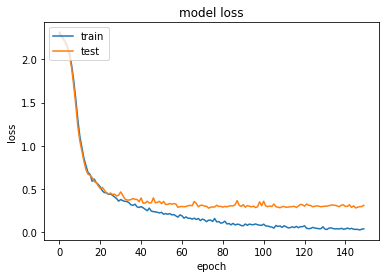

In [36]:
import matplotlib.pyplot as plt
# Plot training & test accuracy values 
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [40]:
#Check adam
def CNN2(epochs,dropout):
    model2 = Sequential()
    model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Dropout(dropout))
    model2.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu'))
    model2.add(Dropout(dropout))
    model2.add(Dense(10, activation='softmax'))
    # Compile the model
    model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model2


In [41]:
classifier2 = KerasClassifier(build_fn = CNN2)
parameters2 = {'epochs': [80,150],'dropout':[0,0.15,0.25]}
grid_search2 = GridSearchCV(estimator = classifier2,param_grid = parameters2)
grid_search2 = grid_search2.fit(X_train,y_oh_train,validation_data = (X_validate,y_oh_validate))


Epoch 1/80
16/16 [==============================] - 0s 14ms/step - loss: 2.1195 - accuracy: 0.3184 - val_loss: 1.8420 - val_accuracy: 0.5063
Epoch 2/80
16/16 [==============================] - 0s 7ms/step - loss: 1.3300 - accuracy: 0.6758 - val_loss: 1.0954 - val_accuracy: 0.6750
Epoch 3/80
16/16 [==============================] - 0s 7ms/step - loss: 0.7451 - accuracy: 0.7773 - val_loss: 0.7752 - val_accuracy: 0.7688
Epoch 4/80
16/16 [==============================] - 0s 8ms/step - loss: 0.4884 - accuracy: 0.8516 - val_loss: 0.6201 - val_accuracy: 0.8062
Epoch 5/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3687 - accuracy: 0.8926 - val_loss: 0.4863 - val_accuracy: 0.8500
Epoch 6/80
16/16 [==============================] - 0s 8ms/step - loss: 0.3180 - accuracy: 0.9082 - val_loss: 0.5269 - val_accuracy: 0.8438
Epoch 7/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2516 - accuracy: 0.9336 - val_loss: 0.4337 - val_accuracy: 0.8562
Epoch 8/80
16/16 [=

Epoch 59/80
16/16 [==============================] - 0s 7ms/step - loss: 5.9028e-04 - accuracy: 1.0000 - val_loss: 0.5116 - val_accuracy: 0.9250
Epoch 60/80
16/16 [==============================] - 0s 7ms/step - loss: 5.7831e-04 - accuracy: 1.0000 - val_loss: 0.5113 - val_accuracy: 0.9250
Epoch 61/80
16/16 [==============================] - 0s 7ms/step - loss: 5.4796e-04 - accuracy: 1.0000 - val_loss: 0.5158 - val_accuracy: 0.9250
Epoch 62/80
16/16 [==============================] - 0s 8ms/step - loss: 5.3292e-04 - accuracy: 1.0000 - val_loss: 0.5139 - val_accuracy: 0.9250
Epoch 63/80
16/16 [==============================] - 0s 8ms/step - loss: 5.1305e-04 - accuracy: 1.0000 - val_loss: 0.5175 - val_accuracy: 0.9250
Epoch 64/80
16/16 [==============================] - 0s 8ms/step - loss: 4.9376e-04 - accuracy: 1.0000 - val_loss: 0.5173 - val_accuracy: 0.9250
Epoch 65/80
16/16 [==============================] - 0s 8ms/step - loss: 4.7691e-04 - accuracy: 1.0000 - val_loss: 0.5202 - val_ac

Epoch 36/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4564 - val_accuracy: 0.9312
Epoch 37/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.9375
Epoch 38/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4641 - val_accuracy: 0.9250
Epoch 39/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4634 - val_accuracy: 0.9250
Epoch 40/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4740 - val_accuracy: 0.9250
Epoch 41/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.9312
Epoch 42/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.9312
Epoch 43/80
1

16/16 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.9922 - val_loss: 0.3678 - val_accuracy: 0.9250
Epoch 13/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0435 - accuracy: 0.9961 - val_loss: 0.3761 - val_accuracy: 0.9062
Epoch 14/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9961 - val_loss: 0.3646 - val_accuracy: 0.9312
Epoch 15/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0259 - accuracy: 0.9961 - val_loss: 0.3549 - val_accuracy: 0.9125
Epoch 16/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.9980 - val_loss: 0.3672 - val_accuracy: 0.9250
Epoch 17/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.3709 - val_accuracy: 0.9187
Epoch 18/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.3831 - val_accuracy: 0.9250
Epoch 19/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 3.5052e-04 - accuracy: 1.0000 - val_loss: 0.5086 - val_accuracy: 0.9187
Epoch 70/80
16/16 [==============================] - 0s 7ms/step - loss: 3.3532e-04 - accuracy: 1.0000 - val_loss: 0.5093 - val_accuracy: 0.9250
Epoch 71/80
16/16 [==============================] - 0s 7ms/step - loss: 3.2297e-04 - accuracy: 1.0000 - val_loss: 0.5103 - val_accuracy: 0.9312
Epoch 72/80
16/16 [==============================] - 0s 7ms/step - loss: 3.0965e-04 - accuracy: 1.0000 - val_loss: 0.5129 - val_accuracy: 0.9312
Epoch 73/80
16/16 [==============================] - 0s 7ms/step - loss: 3.0336e-04 - accuracy: 1.0000 - val_loss: 0.5128 - val_accuracy: 0.9250
Epoch 74/80
16/16 [==============================] - 0s 7ms/step - loss: 2.9255e-04 - accuracy: 1.0000 - val_loss: 0.5169 - val_accuracy: 0.9312
Epoch 75/80
16/16 [==============================] - 0s 7ms/step - loss: 2.8496e-04 - accuracy: 1.0000 - val_loss: 0.5176 - val_accuracy: 0.93

16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4004 - val_accuracy: 0.9375
Epoch 47/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3972 - val_accuracy: 0.9375
Epoch 48/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4018 - val_accuracy: 0.9375
Epoch 49/80
16/16 [==============================] - 0s 7ms/step - loss: 9.8366e-04 - accuracy: 1.0000 - val_loss: 0.4057 - val_accuracy: 0.9375
Epoch 50/80
16/16 [==============================] - 0s 7ms/step - loss: 9.3595e-04 - accuracy: 1.0000 - val_loss: 0.4045 - val_accuracy: 0.9375
Epoch 51/80
16/16 [==============================] - 0s 7ms/step - loss: 8.8099e-04 - accuracy: 1.0000 - val_loss: 0.4064 - val_accuracy: 0.9375
Epoch 52/80
16/16 [==============================] - 0s 7ms/step - loss: 8.6397e-04 - accuracy: 1.0000 - val_loss: 0.4092 - val_accuracy: 0.9375
Epoch 53/

Epoch 23/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.3752 - val_accuracy: 0.9250
Epoch 24/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.4094 - val_accuracy: 0.9250
Epoch 25/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.4004 - val_accuracy: 0.9187
Epoch 26/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4007 - val_accuracy: 0.9250
Epoch 27/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.4066 - val_accuracy: 0.9125
Epoch 28/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4152 - val_accuracy: 0.9250
Epoch 29/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4171 - val_accuracy: 0.9187
Epoch 30/80
1

4/4 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.9453
Epoch 1/150
16/16 [==============================] - 0s 13ms/step - loss: 2.1164 - accuracy: 0.3711 - val_loss: 1.7968 - val_accuracy: 0.5500
Epoch 2/150
16/16 [==============================] - 0s 8ms/step - loss: 1.2973 - accuracy: 0.6992 - val_loss: 1.0073 - val_accuracy: 0.7063
Epoch 3/150
16/16 [==============================] - 0s 8ms/step - loss: 0.7113 - accuracy: 0.7891 - val_loss: 0.7463 - val_accuracy: 0.7750
Epoch 4/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.8652 - val_loss: 0.6619 - val_accuracy: 0.7812
Epoch 5/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3512 - accuracy: 0.9004 - val_loss: 0.5320 - val_accuracy: 0.8438
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3002 - accuracy: 0.9023 - val_loss: 0.5300 - val_accuracy: 0.8500
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - l

Epoch 57/150
16/16 [==============================] - 0s 7ms/step - loss: 7.0502e-04 - accuracy: 1.0000 - val_loss: 0.5978 - val_accuracy: 0.9125
Epoch 58/150
16/16 [==============================] - 0s 7ms/step - loss: 6.6048e-04 - accuracy: 1.0000 - val_loss: 0.5993 - val_accuracy: 0.9125
Epoch 59/150
16/16 [==============================] - 0s 7ms/step - loss: 6.3190e-04 - accuracy: 1.0000 - val_loss: 0.6035 - val_accuracy: 0.9125
Epoch 60/150
16/16 [==============================] - 0s 6ms/step - loss: 6.3273e-04 - accuracy: 1.0000 - val_loss: 0.6044 - val_accuracy: 0.9125
Epoch 61/150
16/16 [==============================] - 0s 7ms/step - loss: 5.8777e-04 - accuracy: 1.0000 - val_loss: 0.6097 - val_accuracy: 0.9125
Epoch 62/150
16/16 [==============================] - 0s 7ms/step - loss: 5.7252e-04 - accuracy: 1.0000 - val_loss: 0.6059 - val_accuracy: 0.9125
Epoch 63/150
16/16 [==============================] - 0s 7ms/step - loss: 5.5362e-04 - accuracy: 1.0000 - val_loss: 0.6073 -

16/16 [==============================] - 0s 7ms/step - loss: 1.4033e-04 - accuracy: 1.0000 - val_loss: 0.6696 - val_accuracy: 0.9125
Epoch 114/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3929e-04 - accuracy: 1.0000 - val_loss: 0.6707 - val_accuracy: 0.9125
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3460e-04 - accuracy: 1.0000 - val_loss: 0.6703 - val_accuracy: 0.9125
Epoch 116/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3338e-04 - accuracy: 1.0000 - val_loss: 0.6740 - val_accuracy: 0.9125
Epoch 117/150
16/16 [==============================] - 0s 7ms/step - loss: 1.2856e-04 - accuracy: 1.0000 - val_loss: 0.6722 - val_accuracy: 0.9125
Epoch 118/150
16/16 [==============================] - 0s 7ms/step - loss: 1.2775e-04 - accuracy: 1.0000 - val_loss: 0.6748 - val_accuracy: 0.9125
Epoch 119/150
16/16 [==============================] - 0s 7ms/step - loss: 1.2383e-04 - accuracy: 1.0000 - val_loss: 0.6752 - val_ac

Epoch 19/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.4045 - val_accuracy: 0.9312
Epoch 20/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9250
Epoch 21/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.4122 - val_accuracy: 0.9250
Epoch 22/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.4172 - val_accuracy: 0.9125
Epoch 23/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.4136 - val_accuracy: 0.9312
Epoch 24/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.4209 - val_accuracy: 0.9250
Epoch 25/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.4205 - val_accuracy: 0.9312
Epoch 

Epoch 76/150
16/16 [==============================] - 0s 7ms/step - loss: 3.9738e-04 - accuracy: 1.0000 - val_loss: 0.5550 - val_accuracy: 0.9312
Epoch 77/150
16/16 [==============================] - 0s 7ms/step - loss: 3.8280e-04 - accuracy: 1.0000 - val_loss: 0.5591 - val_accuracy: 0.9312
Epoch 78/150
16/16 [==============================] - 0s 7ms/step - loss: 3.7185e-04 - accuracy: 1.0000 - val_loss: 0.5606 - val_accuracy: 0.9312
Epoch 79/150
16/16 [==============================] - 0s 7ms/step - loss: 3.6409e-04 - accuracy: 1.0000 - val_loss: 0.5598 - val_accuracy: 0.9312
Epoch 80/150
16/16 [==============================] - 0s 7ms/step - loss: 3.5187e-04 - accuracy: 1.0000 - val_loss: 0.5614 - val_accuracy: 0.9312
Epoch 81/150
16/16 [==============================] - 0s 7ms/step - loss: 3.4414e-04 - accuracy: 1.0000 - val_loss: 0.5624 - val_accuracy: 0.9312
Epoch 82/150
16/16 [==============================] - 0s 7ms/step - loss: 3.2958e-04 - accuracy: 1.0000 - val_loss: 0.5637 -

Epoch 132/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0804e-04 - accuracy: 1.0000 - val_loss: 0.6196 - val_accuracy: 0.9250
Epoch 133/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0622e-04 - accuracy: 1.0000 - val_loss: 0.6185 - val_accuracy: 0.9250
Epoch 134/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0447e-04 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 0.9312
Epoch 135/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0205e-04 - accuracy: 1.0000 - val_loss: 0.6230 - val_accuracy: 0.9250
Epoch 136/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0127e-04 - accuracy: 1.0000 - val_loss: 0.6211 - val_accuracy: 0.9250
Epoch 137/150
16/16 [==============================] - 0s 7ms/step - loss: 9.8473e-05 - accuracy: 1.0000 - val_loss: 0.6247 - val_accuracy: 0.9312
Epoch 138/150
16/16 [==============================] - 0s 7ms/step - loss: 9.6878e-05 - accuracy: 1.0000 - val_loss: 0

16/16 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4402 - val_accuracy: 0.9187
Epoch 39/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4405 - val_accuracy: 0.9125
Epoch 40/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4468 - val_accuracy: 0.9187
Epoch 41/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4414 - val_accuracy: 0.9125
Epoch 42/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4512 - val_accuracy: 0.9187
Epoch 43/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4501 - val_accuracy: 0.9187
Epoch 44/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4530 - val_accuracy: 0.9187
Epoch 45/150
16/16 

16/16 [==============================] - 0s 7ms/step - loss: 2.0432e-04 - accuracy: 1.0000 - val_loss: 0.5242 - val_accuracy: 0.9187
Epoch 95/150
16/16 [==============================] - 0s 8ms/step - loss: 2.0229e-04 - accuracy: 1.0000 - val_loss: 0.5245 - val_accuracy: 0.9187
Epoch 96/150
16/16 [==============================] - 0s 8ms/step - loss: 1.9461e-04 - accuracy: 1.0000 - val_loss: 0.5245 - val_accuracy: 0.9187
Epoch 97/150
16/16 [==============================] - 0s 8ms/step - loss: 1.8935e-04 - accuracy: 1.0000 - val_loss: 0.5249 - val_accuracy: 0.9187
Epoch 98/150
16/16 [==============================] - 0s 8ms/step - loss: 1.8613e-04 - accuracy: 1.0000 - val_loss: 0.5254 - val_accuracy: 0.9187
Epoch 99/150
16/16 [==============================] - 0s 7ms/step - loss: 1.8076e-04 - accuracy: 1.0000 - val_loss: 0.5296 - val_accuracy: 0.9187
Epoch 100/150
16/16 [==============================] - 0s 7ms/step - loss: 1.7736e-04 - accuracy: 1.0000 - val_loss: 0.5294 - val_accurac

Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8018 - accuracy: 0.9062
Epoch 1/150
16/16 [==============================] - 0s 13ms/step - loss: 2.1343 - accuracy: 0.3730 - val_loss: 1.8655 - val_accuracy: 0.6313
Epoch 2/150
16/16 [==============================] - 0s 8ms/step - loss: 1.2936 - accuracy: 0.7461 - val_loss: 0.9055 - val_accuracy: 0.7875
Epoch 3/150
16/16 [==============================] - 0s 8ms/step - loss: 0.6294 - accuracy: 0.8242 - val_loss: 0.5764 - val_accuracy: 0.8562
Epoch 4/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4314 - accuracy: 0.8750 - val_loss: 0.4570 - val_accuracy: 0.8687
Epoch 5/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3382 - accuracy: 0.9082 - val_loss: 0.3862 - val_accuracy: 0.8875
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2430 - accuracy: 0.9336 - val_loss: 0.4153 - val_accuracy: 0.8813
Epoch 7/150
16/16 [==============================] - 0

Epoch 57/150
16/16 [==============================] - 0s 7ms/step - loss: 5.9914e-04 - accuracy: 1.0000 - val_loss: 0.3630 - val_accuracy: 0.9500
Epoch 58/150
16/16 [==============================] - 0s 7ms/step - loss: 5.7306e-04 - accuracy: 1.0000 - val_loss: 0.3609 - val_accuracy: 0.9500
Epoch 59/150
16/16 [==============================] - 0s 7ms/step - loss: 5.6314e-04 - accuracy: 1.0000 - val_loss: 0.3647 - val_accuracy: 0.9500
Epoch 60/150
16/16 [==============================] - 0s 7ms/step - loss: 5.2478e-04 - accuracy: 1.0000 - val_loss: 0.3648 - val_accuracy: 0.9500
Epoch 61/150
16/16 [==============================] - 0s 7ms/step - loss: 5.1259e-04 - accuracy: 1.0000 - val_loss: 0.3677 - val_accuracy: 0.9500
Epoch 62/150
16/16 [==============================] - 0s 7ms/step - loss: 4.9542e-04 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 0.9500
Epoch 63/150
16/16 [==============================] - 0s 7ms/step - loss: 4.6987e-04 - accuracy: 1.0000 - val_loss: 0.3685 -

16/16 [==============================] - 0s 7ms/step - loss: 1.2704e-04 - accuracy: 1.0000 - val_loss: 0.4093 - val_accuracy: 0.9500
Epoch 114/150
16/16 [==============================] - 0s 7ms/step - loss: 1.2472e-04 - accuracy: 1.0000 - val_loss: 0.4074 - val_accuracy: 0.9500
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 1.2159e-04 - accuracy: 1.0000 - val_loss: 0.4092 - val_accuracy: 0.9500
Epoch 116/150
16/16 [==============================] - 0s 7ms/step - loss: 1.1961e-04 - accuracy: 1.0000 - val_loss: 0.4098 - val_accuracy: 0.9500
Epoch 117/150
16/16 [==============================] - 0s 7ms/step - loss: 1.1755e-04 - accuracy: 1.0000 - val_loss: 0.4093 - val_accuracy: 0.9500
Epoch 118/150
16/16 [==============================] - 0s 7ms/step - loss: 1.1548e-04 - accuracy: 1.0000 - val_loss: 0.4118 - val_accuracy: 0.9500
Epoch 119/150
16/16 [==============================] - 0s 7ms/step - loss: 1.1248e-04 - accuracy: 1.0000 - val_loss: 0.4117 - val_ac

Epoch 19/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.4258 - val_accuracy: 0.9250
Epoch 20/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.4108 - val_accuracy: 0.9250
Epoch 21/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.4201 - val_accuracy: 0.9250
Epoch 22/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4331 - val_accuracy: 0.9187
Epoch 23/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.4110 - val_accuracy: 0.9375
Epoch 24/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.4630 - val_accuracy: 0.9250
Epoch 25/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.4355 - val_accuracy: 0.9312
Epoch 

Epoch 76/150
16/16 [==============================] - 0s 7ms/step - loss: 3.6009e-04 - accuracy: 1.0000 - val_loss: 0.5908 - val_accuracy: 0.9250
Epoch 77/150
16/16 [==============================] - 0s 7ms/step - loss: 3.5125e-04 - accuracy: 1.0000 - val_loss: 0.6011 - val_accuracy: 0.9250
Epoch 78/150
16/16 [==============================] - 0s 7ms/step - loss: 3.3766e-04 - accuracy: 1.0000 - val_loss: 0.5945 - val_accuracy: 0.9250
Epoch 79/150
16/16 [==============================] - 0s 7ms/step - loss: 3.2661e-04 - accuracy: 1.0000 - val_loss: 0.5959 - val_accuracy: 0.9250
Epoch 80/150
16/16 [==============================] - 0s 7ms/step - loss: 3.2173e-04 - accuracy: 1.0000 - val_loss: 0.6017 - val_accuracy: 0.9250
Epoch 81/150
16/16 [==============================] - 0s 7ms/step - loss: 3.1456e-04 - accuracy: 1.0000 - val_loss: 0.6058 - val_accuracy: 0.9250
Epoch 82/150
16/16 [==============================] - 0s 7ms/step - loss: 2.9903e-04 - accuracy: 1.0000 - val_loss: 0.6047 -

Epoch 132/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0068e-04 - accuracy: 1.0000 - val_loss: 0.6689 - val_accuracy: 0.9250
Epoch 133/150
16/16 [==============================] - 0s 7ms/step - loss: 9.8962e-05 - accuracy: 1.0000 - val_loss: 0.6686 - val_accuracy: 0.9187
Epoch 134/150
16/16 [==============================] - 0s 7ms/step - loss: 9.8102e-05 - accuracy: 1.0000 - val_loss: 0.6698 - val_accuracy: 0.9187
Epoch 135/150
16/16 [==============================] - 0s 7ms/step - loss: 9.6151e-05 - accuracy: 1.0000 - val_loss: 0.6710 - val_accuracy: 0.9250
Epoch 136/150
16/16 [==============================] - 0s 7ms/step - loss: 9.3761e-05 - accuracy: 1.0000 - val_loss: 0.6708 - val_accuracy: 0.9187
Epoch 137/150
16/16 [==============================] - 0s 7ms/step - loss: 9.1589e-05 - accuracy: 1.0000 - val_loss: 0.6714 - val_accuracy: 0.9187
Epoch 138/150
16/16 [==============================] - 0s 7ms/step - loss: 9.0901e-05 - accuracy: 1.0000 - val_loss: 0

Epoch 39/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3288 - val_accuracy: 0.9375
Epoch 40/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9375
Epoch 41/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.3350 - val_accuracy: 0.9500
Epoch 42/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.3069 - val_accuracy: 0.9500
Epoch 43/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3448 - val_accuracy: 0.9438
Epoch 44/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.3271 - val_accuracy: 0.9375
Epoch 45/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.3690 - val_accuracy: 0.9250
Epoch 46/80
1

16/16 [==============================] - 0s 7ms/step - loss: 0.0546 - accuracy: 0.9824 - val_loss: 0.3320 - val_accuracy: 0.9062
Epoch 17/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.2936 - val_accuracy: 0.9375
Epoch 18/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0469 - accuracy: 0.9922 - val_loss: 0.3197 - val_accuracy: 0.9375
Epoch 19/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0410 - accuracy: 0.9844 - val_loss: 0.3170 - val_accuracy: 0.9438
Epoch 20/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9902 - val_loss: 0.3261 - val_accuracy: 0.9375
Epoch 21/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0272 - accuracy: 0.9961 - val_loss: 0.3158 - val_accuracy: 0.9375
Epoch 22/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0318 - accuracy: 0.9922 - val_loss: 0.3164 - val_accuracy: 0.9125
Epoch 23/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.4130 - val_accuracy: 0.9250
Epoch 75/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.3801 - val_accuracy: 0.9312
Epoch 76/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.4510 - val_accuracy: 0.9438
Epoch 77/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0104 - accuracy: 0.9961 - val_loss: 0.3794 - val_accuracy: 0.9500
Epoch 78/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.4553 - val_accuracy: 0.9312
Epoch 79/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0104 - accuracy: 0.9961 - val_loss: 0.4462 - val_accuracy: 0.9187
Epoch 80/80
4/4 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.9219
Epoch 1/80
16/16 [==============================] - 0s 13ms/step - lo

16/16 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3629 - val_accuracy: 0.9312
Epoch 52/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3889 - val_accuracy: 0.9250
Epoch 53/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3876 - val_accuracy: 0.9375
Epoch 54/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3675 - val_accuracy: 0.9312
Epoch 55/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.4154 - val_accuracy: 0.9500
Epoch 56/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.4195 - val_accuracy: 0.9375
Epoch 57/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.4003 - val_accuracy: 0.9125
Epoch 58/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3696 - val_accuracy: 0.9438
Epoch 29/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.4091 - val_accuracy: 0.9375
Epoch 30/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.3988 - val_accuracy: 0.9312
Epoch 31/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9941 - val_loss: 0.4164 - val_accuracy: 0.9062
Epoch 32/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9961 - val_loss: 0.4206 - val_accuracy: 0.9250
Epoch 33/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.9980 - val_loss: 0.4180 - val_accuracy: 0.9375
Epoch 34/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0174 - accuracy: 0.9980 - val_loss: 0.4227 - val_accuracy: 0.9438
Epoch 35/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.4496 - accuracy: 0.8633 - val_loss: 0.4375 - val_accuracy: 0.8938
Epoch 6/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.8926 - val_loss: 0.6070 - val_accuracy: 0.8250
Epoch 7/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3808 - accuracy: 0.8789 - val_loss: 0.4196 - val_accuracy: 0.8875
Epoch 8/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2734 - accuracy: 0.9199 - val_loss: 0.3577 - val_accuracy: 0.9187
Epoch 9/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2354 - accuracy: 0.9434 - val_loss: 0.3242 - val_accuracy: 0.9000
Epoch 10/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1673 - accuracy: 0.9492 - val_loss: 0.2914 - val_accuracy: 0.9125
Epoch 11/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1277 - accuracy: 0.9609 - val_loss: 0.2938 - val_accuracy: 0.9250
Epoch 12/80
16/16 [==========

16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3031 - val_accuracy: 0.9312
Epoch 64/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.9375
Epoch 65/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3019 - val_accuracy: 0.9375
Epoch 66/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 0.9980 - val_loss: 0.3075 - val_accuracy: 0.9438
Epoch 67/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 0.9500
Epoch 68/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2893 - val_accuracy: 0.9438
Epoch 69/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3080 - val_accuracy: 0.9312
Epoch 70/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0158 - accuracy: 0.9941 - val_loss: 0.3677 - val_accuracy: 0.9187
Epoch 41/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.9980 - val_loss: 0.3575 - val_accuracy: 0.9250
Epoch 42/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.3394 - val_accuracy: 0.9312
Epoch 43/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.3415 - val_accuracy: 0.9438
Epoch 44/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3662 - val_accuracy: 0.9500
Epoch 45/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3777 - val_accuracy: 0.9312
Epoch 46/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3703 - val_accuracy: 0.9312
Epoch 47/150
16/16 

Epoch 98/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4029 - val_accuracy: 0.9438
Epoch 99/150
16/16 [==============================] - 0s 7ms/step - loss: 8.8594e-04 - accuracy: 1.0000 - val_loss: 0.4164 - val_accuracy: 0.9312
Epoch 100/150
16/16 [==============================] - 0s 7ms/step - loss: 4.0413e-04 - accuracy: 1.0000 - val_loss: 0.4185 - val_accuracy: 0.9312
Epoch 101/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9961 - val_loss: 0.4998 - val_accuracy: 0.9062
Epoch 102/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0195 - accuracy: 0.9961 - val_loss: 0.5467 - val_accuracy: 0.9000
Epoch 103/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9902 - val_loss: 0.6255 - val_accuracy: 0.8938
Epoch 104/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.4220 - val_accuracy: 

Epoch 4/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5908 - accuracy: 0.8340 - val_loss: 0.5193 - val_accuracy: 0.8625
Epoch 5/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4400 - accuracy: 0.8633 - val_loss: 0.4103 - val_accuracy: 0.8750
Epoch 6/150
16/16 [==============================] - 0s 8ms/step - loss: 0.3267 - accuracy: 0.9004 - val_loss: 0.4106 - val_accuracy: 0.9062
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2948 - accuracy: 0.9023 - val_loss: 0.3444 - val_accuracy: 0.9125
Epoch 8/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2699 - accuracy: 0.9180 - val_loss: 0.3333 - val_accuracy: 0.9125
Epoch 9/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2067 - accuracy: 0.9453 - val_loss: 0.3237 - val_accuracy: 0.9062
Epoch 10/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1674 - accuracy: 0.9492 - val_loss: 0.3082 - val_accuracy: 0.9312
Epoch 11/150

Epoch 62/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3378 - val_accuracy: 0.9500
Epoch 63/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3462 - val_accuracy: 0.9375
Epoch 64/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3483 - val_accuracy: 0.9438
Epoch 65/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3499 - val_accuracy: 0.9500
Epoch 66/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3579 - val_accuracy: 0.9563
Epoch 67/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3717 - val_accuracy: 0.9438
Epoch 68/150
16/16 [==============================] - 0s 7ms/step - loss: 8.3826e-04 - accuracy: 1.0000 - val_loss: 0.3787 - val_accuracy: 0.9438
Ep

Epoch 119/150
16/16 [==============================] - 0s 7ms/step - loss: 3.1418e-04 - accuracy: 1.0000 - val_loss: 0.3991 - val_accuracy: 0.9563
Epoch 120/150
16/16 [==============================] - 0s 7ms/step - loss: 2.4027e-04 - accuracy: 1.0000 - val_loss: 0.3998 - val_accuracy: 0.9563
Epoch 121/150
16/16 [==============================] - 0s 7ms/step - loss: 5.3899e-04 - accuracy: 1.0000 - val_loss: 0.4105 - val_accuracy: 0.9563
Epoch 122/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3764 - val_accuracy: 0.9625
Epoch 123/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3676 - val_accuracy: 0.9625
Epoch 124/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.4690 - val_accuracy: 0.9438
Epoch 125/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4208 - val_accu

16/16 [==============================] - 0s 7ms/step - loss: 0.0259 - accuracy: 0.9941 - val_loss: 0.3473 - val_accuracy: 0.9312
Epoch 26/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0364 - accuracy: 0.9922 - val_loss: 0.2779 - val_accuracy: 0.9625
Epoch 27/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0187 - accuracy: 0.9980 - val_loss: 0.3077 - val_accuracy: 0.9250
Epoch 28/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9980 - val_loss: 0.3083 - val_accuracy: 0.9438
Epoch 29/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.2951 - val_accuracy: 0.9500
Epoch 30/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0189 - accuracy: 0.9980 - val_loss: 0.3482 - val_accuracy: 0.9438
Epoch 31/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.9961 - val_loss: 0.3333 - val_accuracy: 0.9375
Epoch 32/150
16/16 

Epoch 83/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3428 - val_accuracy: 0.9563
Epoch 84/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 0.9980 - val_loss: 0.3315 - val_accuracy: 0.9563
Epoch 85/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 0.3492 - val_accuracy: 0.9563
Epoch 86/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3226 - val_accuracy: 0.9500
Epoch 87/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3193 - val_accuracy: 0.9625
Epoch 88/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3434 - val_accuracy: 0.9625
Epoch 89/150
16/16 [==============================] - 0s 7ms/step - loss: 6.9516e-04 - accuracy: 1.0000 - val_loss: 0.3537 - val_accuracy: 0.9563
Ep

Epoch 140/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3872e-04 - accuracy: 1.0000 - val_loss: 0.4526 - val_accuracy: 0.9375
Epoch 141/150
16/16 [==============================] - 0s 7ms/step - loss: 1.8093e-04 - accuracy: 1.0000 - val_loss: 0.4475 - val_accuracy: 0.9375
Epoch 142/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4796 - val_accuracy: 0.9500
Epoch 143/150
16/16 [==============================] - 0s 7ms/step - loss: 1.1587e-04 - accuracy: 1.0000 - val_loss: 0.4433 - val_accuracy: 0.9500
Epoch 144/150
16/16 [==============================] - 0s 7ms/step - loss: 8.6326e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.9500
Epoch 145/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5092 - val_accuracy: 0.9500
Epoch 146/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9902 - val_loss: 0.4904 - val_

Epoch 47/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.3323 - val_accuracy: 0.9312
Epoch 48/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3126 - val_accuracy: 0.9500
Epoch 49/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3283 - val_accuracy: 0.9438
Epoch 50/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3335 - val_accuracy: 0.9312
Epoch 51/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3194 - val_accuracy: 0.9438
Epoch 52/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.3522 - val_accuracy: 0.9375
Epoch 53/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 0.9980 - val_loss: 0.3564 - val_accuracy: 0.9312
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3290 - val_accuracy: 0.9500
Epoch 105/150
16/16 [==============================] - 0s 7ms/step - loss: 9.1720e-04 - accuracy: 1.0000 - val_loss: 0.3284 - val_accuracy: 0.9563
Epoch 106/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3724 - val_accuracy: 0.9375
Epoch 107/150
16/16 [==============================] - 0s 7ms/step - loss: 6.4978e-04 - accuracy: 1.0000 - val_loss: 0.3916 - val_accuracy: 0.9375
Epoch 108/150
16/16 [==============================] - 0s 7ms/step - loss: 6.3138e-04 - accuracy: 1.0000 - val_loss: 0.3867 - val_accuracy: 0.9500
Epoch 109/150
16/16 [==============================] - 0s 7ms/step - loss: 5.7635e-04 - accuracy: 1.0000 - val_loss: 0.3855 - val_accuracy: 0.9375
Epoch 110/150
16/16 [==============================] - 0s 7ms/step - loss: 6.6054e-04 - accuracy: 1.0000 - val_loss: 0.3757 - val_accuracy: 

16/16 [==============================] - 0s 7ms/step - loss: 0.1694 - accuracy: 0.9473 - val_loss: 0.3206 - val_accuracy: 0.9125
Epoch 11/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1372 - accuracy: 0.9512 - val_loss: 0.3439 - val_accuracy: 0.9125
Epoch 12/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1698 - accuracy: 0.9473 - val_loss: 0.3232 - val_accuracy: 0.9250
Epoch 13/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1223 - accuracy: 0.9629 - val_loss: 0.3152 - val_accuracy: 0.9062
Epoch 14/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1288 - accuracy: 0.9629 - val_loss: 0.3334 - val_accuracy: 0.9187
Epoch 15/150
16/16 [==============================] - 0s 7ms/step - loss: 0.1039 - accuracy: 0.9648 - val_loss: 0.2950 - val_accuracy: 0.9312
Epoch 16/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0596 - accuracy: 0.9844 - val_loss: 0.3155 - val_accuracy: 0.9187
Epoch 17/150
16/16 

Epoch 68/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3452 - val_accuracy: 0.9500
Epoch 69/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3632 - val_accuracy: 0.9375
Epoch 70/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3441 - val_accuracy: 0.9375
Epoch 71/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3428 - val_accuracy: 0.9438
Epoch 72/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.4080 - val_accuracy: 0.9500
Epoch 73/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9980 - val_loss: 0.3399 - val_accuracy: 0.9500
Epoch 74/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3571 - val_accuracy: 0.9438
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4191 - val_accuracy: 0.9375
Epoch 126/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3795 - val_accuracy: 0.9500
Epoch 127/150
16/16 [==============================] - 0s 8ms/step - loss: 6.2339e-04 - accuracy: 1.0000 - val_loss: 0.3689 - val_accuracy: 0.9438
Epoch 128/150
16/16 [==============================] - 0s 8ms/step - loss: 4.0886e-04 - accuracy: 1.0000 - val_loss: 0.3706 - val_accuracy: 0.9375
Epoch 129/150
16/16 [==============================] - 0s 8ms/step - loss: 7.2360e-04 - accuracy: 1.0000 - val_loss: 0.3587 - val_accuracy: 0.9563
Epoch 130/150
16/16 [==============================] - 0s 7ms/step - loss: 8.8197e-04 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.9500
Epoch 131/150
16/16 [==============================] - 0s 7ms/step - loss: 9.6339e-04 - accuracy: 1.0000 - val_loss: 0.3607 - val_accuracy: 

16/16 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9922 - val_loss: 0.3488 - val_accuracy: 0.9187
Epoch 33/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0278 - accuracy: 0.9961 - val_loss: 0.3408 - val_accuracy: 0.9375
Epoch 34/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0274 - accuracy: 0.9883 - val_loss: 0.3386 - val_accuracy: 0.9125
Epoch 35/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9883 - val_loss: 0.3365 - val_accuracy: 0.9187
Epoch 36/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0405 - accuracy: 0.9863 - val_loss: 0.3233 - val_accuracy: 0.9250
Epoch 37/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0208 - accuracy: 0.9961 - val_loss: 0.3607 - val_accuracy: 0.9187
Epoch 38/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0295 - accuracy: 0.9922 - val_loss: 0.3865 - val_accuracy: 0.9250
Epoch 39/80
16/16 [======

16/16 [==============================] - 0s 8ms/step - loss: 0.3464 - accuracy: 0.8945 - val_loss: 0.3790 - val_accuracy: 0.8938
Epoch 10/80
16/16 [==============================] - 0s 7ms/step - loss: 0.3014 - accuracy: 0.9082 - val_loss: 0.3506 - val_accuracy: 0.9250
Epoch 11/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2452 - accuracy: 0.9219 - val_loss: 0.3274 - val_accuracy: 0.9000
Epoch 12/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2555 - accuracy: 0.9297 - val_loss: 0.3284 - val_accuracy: 0.9312
Epoch 13/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2104 - accuracy: 0.9277 - val_loss: 0.2906 - val_accuracy: 0.9250
Epoch 14/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1837 - accuracy: 0.9453 - val_loss: 0.3073 - val_accuracy: 0.9312
Epoch 15/80
16/16 [==============================] - 0s 8ms/step - loss: 0.1522 - accuracy: 0.9512 - val_loss: 0.2926 - val_accuracy: 0.9125
Epoch 16/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3474 - val_accuracy: 0.9375
Epoch 68/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.3509 - val_accuracy: 0.9563
Epoch 69/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3518 - val_accuracy: 0.9500
Epoch 70/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3514 - val_accuracy: 0.9438
Epoch 71/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3533 - val_accuracy: 0.9500
Epoch 72/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.9312
Epoch 73/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.3387 - val_accuracy: 0.9500
Epoch 74/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0187 - accuracy: 0.9980 - val_loss: 0.3791 - val_accuracy: 0.9187
Epoch 45/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0124 - accuracy: 0.9980 - val_loss: 0.3755 - val_accuracy: 0.9312
Epoch 46/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.4088 - val_accuracy: 0.9312
Epoch 47/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.4257 - val_accuracy: 0.9375
Epoch 48/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.3571 - val_accuracy: 0.9250
Epoch 49/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0146 - accuracy: 0.9961 - val_loss: 0.3973 - val_accuracy: 0.9187
Epoch 50/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9941 - val_loss: 0.3785 - val_accuracy: 0.9187
Epoch 51/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0644 - accuracy: 0.9844 - val_loss: 0.3155 - val_accuracy: 0.9375
Epoch 22/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0721 - accuracy: 0.9746 - val_loss: 0.2820 - val_accuracy: 0.9187
Epoch 23/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0629 - accuracy: 0.9785 - val_loss: 0.3209 - val_accuracy: 0.9375
Epoch 24/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9941 - val_loss: 0.3000 - val_accuracy: 0.9375
Epoch 25/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9824 - val_loss: 0.3103 - val_accuracy: 0.9312
Epoch 26/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0446 - accuracy: 0.9844 - val_loss: 0.3650 - val_accuracy: 0.9312
Epoch 27/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0524 - accuracy: 0.9883 - val_loss: 0.3085 - val_accuracy: 0.9375
Epoch 28/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.3877 - val_accuracy: 0.9438
Epoch 80/80
4/4 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.9297
Epoch 1/80
16/16 [==============================] - 0s 13ms/step - loss: 2.1680 - accuracy: 0.2383 - val_loss: 1.9884 - val_accuracy: 0.5625
Epoch 2/80
16/16 [==============================] - 0s 7ms/step - loss: 1.5978 - accuracy: 0.5508 - val_loss: 1.1961 - val_accuracy: 0.7625
Epoch 3/80
16/16 [==============================] - 0s 7ms/step - loss: 0.9786 - accuracy: 0.6875 - val_loss: 0.8567 - val_accuracy: 0.7688
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 0.7715 - accuracy: 0.7598 - val_loss: 0.6659 - val_accuracy: 0.8313
Epoch 5/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5777 - accuracy: 0.8262 - val_loss: 0.5631 - val_accuracy: 0.8625
Epoch 6/80
16/16 [==============================] - 0s 7ms/step - loss: 0

16/16 [==============================] - 0s 7ms/step - loss: 0.0284 - accuracy: 0.9922 - val_loss: 0.4175 - val_accuracy: 0.9250
Epoch 57/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 0.9961 - val_loss: 0.4146 - val_accuracy: 0.9062
Epoch 58/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.3724 - val_accuracy: 0.9375
Epoch 59/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.9980 - val_loss: 0.4205 - val_accuracy: 0.9250
Epoch 60/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.3913 - val_accuracy: 0.9438
Epoch 61/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.3905 - val_accuracy: 0.9312
Epoch 62/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9922 - val_loss: 0.3741 - val_accuracy: 0.9375
Epoch 63/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9922 - val_loss: 0.3346 - val_accuracy: 0.9250
Epoch 34/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9902 - val_loss: 0.3385 - val_accuracy: 0.9312
Epoch 35/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.3074 - val_accuracy: 0.9312
Epoch 36/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 0.3625 - val_accuracy: 0.9187
Epoch 37/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9902 - val_loss: 0.3550 - val_accuracy: 0.9187
Epoch 38/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0189 - accuracy: 0.9961 - val_loss: 0.3970 - val_accuracy: 0.9187
Epoch 39/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.9922 - val_loss: 0.3640 - val_accuracy: 0.9250
Epoch 40/150
16/16 

Epoch 91/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9980 - val_loss: 0.4374 - val_accuracy: 0.9250
Epoch 92/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.4232 - val_accuracy: 0.9187
Epoch 93/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.3926 - val_accuracy: 0.9312
Epoch 94/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.9980 - val_loss: 0.4156 - val_accuracy: 0.9250
Epoch 95/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0124 - accuracy: 0.9941 - val_loss: 0.3901 - val_accuracy: 0.9312
Epoch 96/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4178 - val_accuracy: 0.9312
Epoch 97/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 0.3890 - val_accuracy: 0.9312
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.4776 - val_accuracy: 0.9312
Epoch 149/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4721 - val_accuracy: 0.9062
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.8906
Epoch 1/150
16/16 [==============================] - 0s 13ms/step - loss: 2.1824 - accuracy: 0.2812 - val_loss: 1.9998 - val_accuracy: 0.6500
Epoch 2/150
16/16 [==============================] - 0s 9ms/step - loss: 1.6560 - accuracy: 0.5508 - val_loss: 1.3011 - val_accuracy: 0.7500
Epoch 3/150
16/16 [==============================] - 0s 8ms/step - loss: 1.0962 - accuracy: 0.6602 - val_loss: 0.8999 - val_accuracy: 0.7750
Epoch 4/150
16/16 [==============================] - 0s 7ms/step - loss: 0.8426 - accuracy: 0.7383 - val_loss: 0.7371 - val_accuracy: 0.7875
Epoch 5/150
16/16 [==============================] - 0s 7ms/step

16/16 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.9980 - val_loss: 0.4312 - val_accuracy: 0.9250
Epoch 56/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.4494 - val_accuracy: 0.9250
Epoch 57/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0177 - accuracy: 0.9922 - val_loss: 0.4092 - val_accuracy: 0.9312
Epoch 58/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.4196 - val_accuracy: 0.9250
Epoch 59/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0163 - accuracy: 0.9941 - val_loss: 0.4233 - val_accuracy: 0.9375
Epoch 60/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.4301 - val_accuracy: 0.9438
Epoch 61/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9980 - val_loss: 0.4523 - val_accuracy: 0.9375
Epoch 62/150
16/16 

Epoch 113/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.9961 - val_loss: 0.5085 - val_accuracy: 0.9125
Epoch 114/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5399 - val_accuracy: 0.9187
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 0.9980 - val_loss: 0.5314 - val_accuracy: 0.9187
Epoch 116/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.5449 - val_accuracy: 0.9187
Epoch 117/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0040 - accuracy: 0.9980 - val_loss: 0.5693 - val_accuracy: 0.9062
Epoch 118/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.5591 - val_accuracy: 0.9062
Epoch 119/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.4954 - val_accuracy: 0.9375

Epoch 20/150
16/16 [==============================] - 0s 8ms/step - loss: 0.1069 - accuracy: 0.9668 - val_loss: 0.3203 - val_accuracy: 0.9250
Epoch 21/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0979 - accuracy: 0.9707 - val_loss: 0.3612 - val_accuracy: 0.9125
Epoch 22/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0776 - accuracy: 0.9805 - val_loss: 0.3158 - val_accuracy: 0.9062
Epoch 23/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0801 - accuracy: 0.9766 - val_loss: 0.3339 - val_accuracy: 0.9062
Epoch 24/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0816 - accuracy: 0.9746 - val_loss: 0.3363 - val_accuracy: 0.9187
Epoch 25/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0778 - accuracy: 0.9883 - val_loss: 0.2969 - val_accuracy: 0.9375
Epoch 26/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0620 - accuracy: 0.9844 - val_loss: 0.3267 - val_accuracy: 0.9250
Epoch 

Epoch 78/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9961 - val_loss: 0.3580 - val_accuracy: 0.9563
Epoch 79/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.3539 - val_accuracy: 0.9500
Epoch 80/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3621 - val_accuracy: 0.9563
Epoch 81/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9961 - val_loss: 0.3619 - val_accuracy: 0.9438
Epoch 82/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 0.3831 - val_accuracy: 0.9375
Epoch 83/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0101 - accuracy: 0.9980 - val_loss: 0.3703 - val_accuracy: 0.9312
Epoch 84/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9941 - val_loss: 0.3581 - val_accuracy: 0.9375
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4361 - val_accuracy: 0.9375
Epoch 136/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.5196 - val_accuracy: 0.9250
Epoch 137/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.9922 - val_loss: 0.4862 - val_accuracy: 0.9312
Epoch 138/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.9961 - val_loss: 0.4729 - val_accuracy: 0.9250
Epoch 139/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4417 - val_accuracy: 0.9312
Epoch 140/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 0.9980 - val_loss: 0.4313 - val_accuracy: 0.9187
Epoch 141/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0043 - accuracy: 0.9980 - val_loss: 0.4238 - val_accuracy: 0.9187
Epoch 142/150

16/16 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.9902 - val_loss: 0.3617 - val_accuracy: 0.9250
Epoch 43/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.9980 - val_loss: 0.3186 - val_accuracy: 0.9438
Epoch 44/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 0.9941 - val_loss: 0.3140 - val_accuracy: 0.9438
Epoch 45/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0121 - accuracy: 0.9980 - val_loss: 0.3392 - val_accuracy: 0.9375
Epoch 46/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.3391 - val_accuracy: 0.9375
Epoch 47/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.3500 - val_accuracy: 0.9375
Epoch 48/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 0.9941 - val_loss: 0.3313 - val_accuracy: 0.9438
Epoch 49/150
16/16 

Epoch 100/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.4104 - val_accuracy: 0.9375
Epoch 101/150
16/16 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3969 - val_accuracy: 0.9375
Epoch 102/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3965 - val_accuracy: 0.9375
Epoch 103/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3962 - val_accuracy: 0.9375
Epoch 104/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.3776 - val_accuracy: 0.9438
Epoch 105/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9961 - val_loss: 0.3710 - val_accuracy: 0.9500
Epoch 106/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.3535 - val_accuracy: 0.9312

16/16 [==============================] - 0s 7ms/step - loss: 0.5229 - accuracy: 0.8301 - val_loss: 0.5895 - val_accuracy: 0.8250
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4751 - accuracy: 0.8438 - val_loss: 0.4970 - val_accuracy: 0.8500
Epoch 8/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3900 - accuracy: 0.8730 - val_loss: 0.4278 - val_accuracy: 0.8875
Epoch 9/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3270 - accuracy: 0.9062 - val_loss: 0.3818 - val_accuracy: 0.8875
Epoch 10/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2867 - accuracy: 0.9121 - val_loss: 0.3608 - val_accuracy: 0.8875
Epoch 11/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2527 - accuracy: 0.9199 - val_loss: 0.3325 - val_accuracy: 0.9125
Epoch 12/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2375 - accuracy: 0.9219 - val_loss: 0.3098 - val_accuracy: 0.9187
Epoch 13/150
16/16 [==

Epoch 64/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.3112 - val_accuracy: 0.9438
Epoch 65/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.3301 - val_accuracy: 0.9375
Epoch 66/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.3321 - val_accuracy: 0.9438
Epoch 67/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3095 - val_accuracy: 0.9563
Epoch 68/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.9961 - val_loss: 0.2760 - val_accuracy: 0.9563
Epoch 69/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.3438 - val_accuracy: 0.9500
Epoch 70/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 0.3438 - val_accuracy: 0.9375
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3782 - val_accuracy: 0.9375
Epoch 122/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3107 - val_accuracy: 0.9625
Epoch 123/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.4123 - val_accuracy: 0.9312
Epoch 124/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.3631 - val_accuracy: 0.9375
Epoch 125/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.4387 - val_accuracy: 0.9312
Epoch 126/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0145 - accuracy: 0.9922 - val_loss: 0.4061 - val_accuracy: 0.9500
Epoch 127/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.4232 - val_accuracy: 0.9375
Epoch 128/150

Epoch 28/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9937 - val_loss: 0.3389 - val_accuracy: 0.9312
Epoch 29/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.3592 - val_accuracy: 0.9250
Epoch 30/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.3310 - val_accuracy: 0.9375
Epoch 31/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.3168 - val_accuracy: 0.9438
Epoch 32/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.3359 - val_accuracy: 0.9375
Epoch 33/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.3802 - val_accuracy: 0.9187
Epoch 34/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.3480 - val_accuracy: 0.9250
Epoch 

20/20 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3661 - val_accuracy: 0.9500
Epoch 86/150
20/20 [==============================] - 0s 7ms/step - loss: 6.8461e-04 - accuracy: 1.0000 - val_loss: 0.3596 - val_accuracy: 0.9563
Epoch 87/150
20/20 [==============================] - 0s 7ms/step - loss: 9.4399e-04 - accuracy: 1.0000 - val_loss: 0.3680 - val_accuracy: 0.9500
Epoch 88/150
20/20 [==============================] - 0s 7ms/step - loss: 4.7925e-04 - accuracy: 1.0000 - val_loss: 0.3799 - val_accuracy: 0.9375
Epoch 89/150
20/20 [==============================] - 0s 7ms/step - loss: 6.8194e-04 - accuracy: 1.0000 - val_loss: 0.3826 - val_accuracy: 0.9375
Epoch 90/150
20/20 [==============================] - 0s 7ms/step - loss: 9.0843e-04 - accuracy: 1.0000 - val_loss: 0.3935 - val_accuracy: 0.9500
Epoch 91/150
20/20 [==============================] - 0s 7ms/step - loss: 6.5438e-04 - accuracy: 1.0000 - val_loss: 0.3944 - val_accuracy: 0.

20/20 [==============================] - 0s 7ms/step - loss: 7.2431e-04 - accuracy: 1.0000 - val_loss: 0.4592 - val_accuracy: 0.9500
Epoch 142/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 0.9984 - val_loss: 0.3774 - val_accuracy: 0.9500
Epoch 143/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.4444 - val_accuracy: 0.9438
Epoch 144/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.4790 - val_accuracy: 0.9312
Epoch 145/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.4717 - val_accuracy: 0.9125
Epoch 146/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0171 - accuracy: 0.9937 - val_loss: 0.4150 - val_accuracy: 0.9375
Epoch 147/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.3443 - val_accuracy: 0.9438
Epoch 148

In [42]:
best_parameters2= grid_search2.best_params_

In [43]:
best_parameters2

{'dropout': 0.15, 'epochs': 150}

In [55]:
#0.9328125  {'dropout': 0.15, 'epochs': 150} for adam
best_accuracy2 = grid_search2.best_score_
print(best_accuracy2)

0.9328125


In [44]:
model_2 = Sequential()
model_2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.15))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.15))
model_2.add(Dense(10, activation='softmax'))
# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
# Train the model
history2=model_2.fit(X_train, y_oh_train, batch_size=32, epochs=150,validation_data = (X_validate,y_oh_validate))
# Evaluate performance
test_loss2 = model_2.evaluate(X_test, y_oh_test, batch_size=32)
predictions2 = model_2.predict(X_test, batch_size=32)
predictions2 = np.argmax(predictions2, axis=1) # change encoding again
print('Accuracy:', (predictions2 == y_test).sum() / predictions2.shape[0])   

Epoch 1/150
20/20 [==============================] - 0s 12ms/step - loss: 1.9748 - accuracy: 0.3375 - val_loss: 1.5516 - val_accuracy: 0.6875
Epoch 2/150
20/20 [==============================] - 0s 7ms/step - loss: 1.0583 - accuracy: 0.6938 - val_loss: 0.8479 - val_accuracy: 0.7688
Epoch 3/150
20/20 [==============================] - 0s 7ms/step - loss: 0.6447 - accuracy: 0.7984 - val_loss: 0.6088 - val_accuracy: 0.8250
Epoch 4/150
20/20 [==============================] - 0s 7ms/step - loss: 0.4822 - accuracy: 0.8406 - val_loss: 0.5032 - val_accuracy: 0.8687
Epoch 5/150
20/20 [==============================] - 0s 7ms/step - loss: 0.3804 - accuracy: 0.8922 - val_loss: 0.4735 - val_accuracy: 0.8562
Epoch 6/150
20/20 [==============================] - 0s 7ms/step - loss: 0.3283 - accuracy: 0.8984 - val_loss: 0.4219 - val_accuracy: 0.8687
Epoch 7/150
20/20 [==============================] - 0s 7ms/step - loss: 0.2787 - accuracy: 0.9141 - val_loss: 0.4148 - val_accuracy: 0.8562
Epoch 8/150


Epoch 59/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.3955 - val_accuracy: 0.9500
Epoch 60/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.3547 - val_accuracy: 0.9438
Epoch 61/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.3735 - val_accuracy: 0.9500
Epoch 62/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3313 - val_accuracy: 0.9563
Epoch 63/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.9969 - val_loss: 0.3761 - val_accuracy: 0.9375
Epoch 64/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.3839 - val_accuracy: 0.9438
Epoch 65/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.3700 - val_accuracy: 0.9375
Epoch 

20/20 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2943 - val_accuracy: 0.9563
Epoch 117/150
20/20 [==============================] - 0s 6ms/step - loss: 6.2900e-04 - accuracy: 1.0000 - val_loss: 0.3053 - val_accuracy: 0.9500
Epoch 118/150
20/20 [==============================] - 0s 6ms/step - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.3078 - val_accuracy: 0.9563
Epoch 119/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2794 - val_accuracy: 0.9563
Epoch 120/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3538 - val_accuracy: 0.9500
Epoch 121/150
20/20 [==============================] - 0s 7ms/step - loss: 6.2712e-04 - accuracy: 1.0000 - val_loss: 0.3584 - val_accuracy: 0.9500
Epoch 122/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.3954 - val_accuracy: 0.9438
Epoch

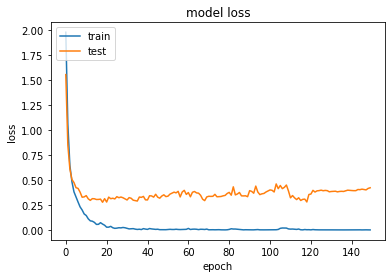

In [45]:
import matplotlib.pyplot as plt
# Plot training & test accuracy values 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
#check rmsprop
def CNN3(epochs,dropout):
    model3 = Sequential()
    model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Dropout(dropout))
    model3.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Flatten())
    model3.add(Dense(128, activation='relu'))
    model3.add(Dropout(dropout))
    model3.add(Dense(10, activation='softmax'))
    # Compile the model
    model3.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
    return model3

In [47]:
classifier3 = KerasClassifier(build_fn = CNN3)
parameters3 = {'epochs': [80,150],'dropout':[0,0.15,0.25]}
grid_search3 = GridSearchCV(estimator = classifier3,param_grid = parameters3)
grid_search3 = grid_search3.fit(X_train,y_oh_train,validation_data = (X_validate,y_oh_validate))

Epoch 1/80
16/16 [==============================] - 0s 14ms/step - loss: 1.8567 - accuracy: 0.4219 - val_loss: 1.5839 - val_accuracy: 0.3625
Epoch 2/80
16/16 [==============================] - 0s 8ms/step - loss: 0.9648 - accuracy: 0.7129 - val_loss: 0.9356 - val_accuracy: 0.7375
Epoch 3/80
16/16 [==============================] - 0s 8ms/step - loss: 0.6413 - accuracy: 0.8086 - val_loss: 0.6679 - val_accuracy: 0.8062
Epoch 4/80
16/16 [==============================] - 0s 9ms/step - loss: 0.4820 - accuracy: 0.8613 - val_loss: 0.6957 - val_accuracy: 0.7750
Epoch 5/80
16/16 [==============================] - 0s 8ms/step - loss: 0.3956 - accuracy: 0.8906 - val_loss: 0.5271 - val_accuracy: 0.8313
Epoch 6/80
16/16 [==============================] - 0s 9ms/step - loss: 0.3018 - accuracy: 0.9102 - val_loss: 0.5686 - val_accuracy: 0.8375
Epoch 7/80
16/16 [==============================] - 0s 9ms/step - loss: 0.2595 - accuracy: 0.9219 - val_loss: 0.4735 - val_accuracy: 0.8562
Epoch 8/80
16/16 [=

16/16 [==============================] - 0s 9ms/step - loss: 2.1264e-05 - accuracy: 1.0000 - val_loss: 0.6032 - val_accuracy: 0.9250
Epoch 59/80
16/16 [==============================] - 0s 8ms/step - loss: 1.0309e-05 - accuracy: 1.0000 - val_loss: 0.6057 - val_accuracy: 0.9250
Epoch 60/80
16/16 [==============================] - 0s 7ms/step - loss: 8.0268e-06 - accuracy: 1.0000 - val_loss: 0.5911 - val_accuracy: 0.9312
Epoch 61/80
16/16 [==============================] - 0s 8ms/step - loss: 5.5690e-06 - accuracy: 1.0000 - val_loss: 0.5868 - val_accuracy: 0.9312
Epoch 62/80
16/16 [==============================] - 0s 8ms/step - loss: 4.5063e-06 - accuracy: 1.0000 - val_loss: 0.6158 - val_accuracy: 0.9250
Epoch 63/80
16/16 [==============================] - 0s 9ms/step - loss: 3.9762e-06 - accuracy: 1.0000 - val_loss: 0.6318 - val_accuracy: 0.9250
Epoch 64/80
16/16 [==============================] - 0s 9ms/step - loss: 2.1055e-06 - accuracy: 1.0000 - val_loss: 0.6416 - val_accuracy: 0.92

Epoch 35/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.5694 - val_accuracy: 0.9125
Epoch 36/80
16/16 [==============================] - 0s 8ms/step - loss: 3.2824e-04 - accuracy: 1.0000 - val_loss: 0.5802 - val_accuracy: 0.9250
Epoch 37/80
16/16 [==============================] - 0s 8ms/step - loss: 9.5991e-05 - accuracy: 1.0000 - val_loss: 0.5600 - val_accuracy: 0.9187
Epoch 38/80
16/16 [==============================] - 0s 7ms/step - loss: 5.7609e-05 - accuracy: 1.0000 - val_loss: 0.5782 - val_accuracy: 0.9312
Epoch 39/80
16/16 [==============================] - 0s 8ms/step - loss: 4.3428e-05 - accuracy: 1.0000 - val_loss: 0.6120 - val_accuracy: 0.9187
Epoch 40/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0531 - accuracy: 0.9883 - val_loss: 0.5278 - val_accuracy: 0.9375
Epoch 41/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5532 - val_accuracy: 0.92

16/16 [==============================] - 0s 8ms/step - loss: 0.0847 - accuracy: 0.9746 - val_loss: 0.2796 - val_accuracy: 0.9500
Epoch 12/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0671 - accuracy: 0.9805 - val_loss: 0.3287 - val_accuracy: 0.9125
Epoch 13/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.3124 - val_accuracy: 0.9250
Epoch 14/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.3586 - val_accuracy: 0.9250
Epoch 15/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.9961 - val_loss: 0.3783 - val_accuracy: 0.9250
Epoch 16/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0223 - accuracy: 0.9980 - val_loss: 0.3530 - val_accuracy: 0.9312
Epoch 17/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 0.9980 - val_loss: 0.4336 - val_accuracy: 0.9312
Epoch 18/80
16/16 [======

16/16 [==============================] - 0s 8ms/step - loss: 1.0931e-06 - accuracy: 1.0000 - val_loss: 0.6465 - val_accuracy: 0.9375
Epoch 69/80
16/16 [==============================] - 0s 8ms/step - loss: 6.7474e-07 - accuracy: 1.0000 - val_loss: 0.6539 - val_accuracy: 0.9438
Epoch 70/80
16/16 [==============================] - 0s 7ms/step - loss: 4.8335e-07 - accuracy: 1.0000 - val_loss: 0.7318 - val_accuracy: 0.9438
Epoch 71/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0341 - accuracy: 0.9863 - val_loss: 0.6940 - val_accuracy: 0.9312
Epoch 72/80
16/16 [==============================] - 0s 8ms/step - loss: 8.1123e-06 - accuracy: 1.0000 - val_loss: 0.6968 - val_accuracy: 0.9312
Epoch 73/80
16/16 [==============================] - 0s 7ms/step - loss: 7.0034e-06 - accuracy: 1.0000 - val_loss: 0.7006 - val_accuracy: 0.9438
Epoch 74/80
16/16 [==============================] - 0s 7ms/step - loss: 5.0906e-06 - accuracy: 1.0000 - val_loss: 0.6978 - val_accuracy: 0.9438
E

Epoch 45/80
16/16 [==============================] - 0s 8ms/step - loss: 7.3258e-05 - accuracy: 1.0000 - val_loss: 0.4255 - val_accuracy: 0.9312
Epoch 46/80
16/16 [==============================] - 0s 7ms/step - loss: 4.6320e-05 - accuracy: 1.0000 - val_loss: 0.4318 - val_accuracy: 0.9312
Epoch 47/80
16/16 [==============================] - 0s 7ms/step - loss: 3.1643e-05 - accuracy: 1.0000 - val_loss: 0.4413 - val_accuracy: 0.9312
Epoch 48/80
16/16 [==============================] - 0s 7ms/step - loss: 2.3939e-05 - accuracy: 1.0000 - val_loss: 0.4498 - val_accuracy: 0.9250
Epoch 49/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1738 - val_accuracy: 0.8188
Epoch 50/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.4707 - val_accuracy: 0.9375
Epoch 51/80
16/16 [==============================] - 0s 8ms/step - loss: 6.9501e-05 - accuracy: 1.0000 - val_loss: 0.4629 - val_accuracy: 

16/16 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.2844 - val_accuracy: 0.9375
Epoch 22/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.3592 - val_accuracy: 0.9312
Epoch 23/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.3372 - val_accuracy: 0.9438
Epoch 24/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.3640 - val_accuracy: 0.9125
Epoch 25/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0205 - accuracy: 0.9883 - val_loss: 0.5779 - val_accuracy: 0.8875
Epoch 26/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.9961 - val_loss: 0.3260 - val_accuracy: 0.9312
Epoch 27/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3527 - val_accuracy: 0.9312
Epoch 28/80
16/16 [======

Epoch 78/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.8599 - val_accuracy: 0.8875
Epoch 79/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.6924 - val_accuracy: 0.9375
Epoch 80/80
4/4 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.9609
Epoch 1/150
16/16 [==============================] - 0s 14ms/step - loss: 1.7735 - accuracy: 0.4258 - val_loss: 1.5562 - val_accuracy: 0.3562
Epoch 2/150
16/16 [==============================] - 0s 7ms/step - loss: 0.8722 - accuracy: 0.7441 - val_loss: 0.8696 - val_accuracy: 0.7312
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - loss: 0.6093 - accuracy: 0.8281 - val_loss: 0.6479 - val_accuracy: 0.8188
Epoch 4/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4637 - accuracy: 0.8750 - val_loss: 0.6389 - val_accuracy: 0.7750
Epoch 5/150
16/16 [==============================] - 0s 

16/16 [==============================] - 0s 8ms/step - loss: 2.5535e-05 - accuracy: 1.0000 - val_loss: 0.5774 - val_accuracy: 0.9312
Epoch 55/150
16/16 [==============================] - 0s 7ms/step - loss: 1.7009e-05 - accuracy: 1.0000 - val_loss: 0.5736 - val_accuracy: 0.9375
Epoch 56/150
16/16 [==============================] - 0s 8ms/step - loss: 1.1917e-05 - accuracy: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.9375
Epoch 57/150
16/16 [==============================] - 0s 8ms/step - loss: 8.9031e-06 - accuracy: 1.0000 - val_loss: 0.5674 - val_accuracy: 0.9375
Epoch 58/150
16/16 [==============================] - 0s 8ms/step - loss: 5.8727e-06 - accuracy: 1.0000 - val_loss: 0.5778 - val_accuracy: 0.9312
Epoch 59/150
16/16 [==============================] - 0s 8ms/step - loss: 4.3801e-06 - accuracy: 1.0000 - val_loss: 0.5591 - val_accuracy: 0.9375
Epoch 60/150
16/16 [==============================] - 0s 8ms/step - loss: 3.9684e-06 - accuracy: 1.0000 - val_loss: 0.7681 - val_accuracy

16/16 [==============================] - 0s 7ms/step - loss: 6.9849e-10 - accuracy: 1.0000 - val_loss: 0.8870 - val_accuracy: 0.9250
Epoch 111/150
16/16 [==============================] - 0s 7ms/step - loss: 1.1642e-09 - accuracy: 1.0000 - val_loss: 0.8933 - val_accuracy: 0.9250
Epoch 112/150
16/16 [==============================] - 0s 7ms/step - loss: 6.9849e-10 - accuracy: 1.0000 - val_loss: 0.9006 - val_accuracy: 0.9250
Epoch 113/150
16/16 [==============================] - 0s 7ms/step - loss: 9.3132e-10 - accuracy: 1.0000 - val_loss: 0.9032 - val_accuracy: 0.9250
Epoch 114/150
16/16 [==============================] - 0s 7ms/step - loss: 1.6298e-09 - accuracy: 1.0000 - val_loss: 0.8981 - val_accuracy: 0.9250
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 9.3132e-10 - accuracy: 1.0000 - val_loss: 0.9094 - val_accuracy: 0.9250
Epoch 116/150
16/16 [==============================] - 0s 8ms/step - loss: 9.3132e-10 - accuracy: 1.0000 - val_loss: 0.9203 - val_ac

Epoch 16/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0381 - accuracy: 0.9922 - val_loss: 0.3829 - val_accuracy: 0.9312
Epoch 17/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.5699 - val_accuracy: 0.8687
Epoch 18/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9961 - val_loss: 0.3761 - val_accuracy: 0.9312
Epoch 19/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.4984 - val_accuracy: 0.9187
Epoch 20/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0155 - accuracy: 0.9941 - val_loss: 0.3930 - val_accuracy: 0.9250
Epoch 21/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.9312
Epoch 22/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.4517 - val_accuracy: 0.9125
Epoch 

Epoch 73/150
16/16 [==============================] - 0s 8ms/step - loss: 2.1429e-06 - accuracy: 1.0000 - val_loss: 0.8070 - val_accuracy: 0.9187
Epoch 74/150
16/16 [==============================] - 0s 8ms/step - loss: 1.5692e-06 - accuracy: 1.0000 - val_loss: 0.8004 - val_accuracy: 0.9250
Epoch 75/150
16/16 [==============================] - 0s 9ms/step - loss: 1.0489e-06 - accuracy: 1.0000 - val_loss: 0.8026 - val_accuracy: 0.9250
Epoch 76/150
16/16 [==============================] - 0s 8ms/step - loss: 7.2107e-07 - accuracy: 1.0000 - val_loss: 0.7973 - val_accuracy: 0.9250
Epoch 77/150
16/16 [==============================] - 0s 8ms/step - loss: 4.8079e-07 - accuracy: 1.0000 - val_loss: 0.8050 - val_accuracy: 0.9250
Epoch 78/150
16/16 [==============================] - 0s 8ms/step - loss: 3.2410e-07 - accuracy: 1.0000 - val_loss: 0.8209 - val_accuracy: 0.9250
Epoch 79/150
16/16 [==============================] - 0s 8ms/step - loss: 2.3143e-07 - accuracy: 1.0000 - val_loss: 0.8309 -

16/16 [==============================] - 0s 8ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.1199 - val_accuracy: 0.9250
Epoch 129/150
16/16 [==============================] - 0s 8ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.1255 - val_accuracy: 0.9250
Epoch 130/150
16/16 [==============================] - 0s 8ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.1388 - val_accuracy: 0.9250
Epoch 131/150
16/16 [==============================] - 0s 7ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.1400 - val_accuracy: 0.9250
Epoch 132/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.1436 - val_accuracy: 0.9250
Epoch 133/150
16/16 [==============================] - 0s 8ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.1491 - val_accuracy: 0.9250
Epoch 134/150
16/16 [==============================] - 0s 7ms/step - loss: 6.9849e-10 - accuracy: 1.0000 - val_loss: 1.1485 - val_ac

16/16 [==============================] - 0s 9ms/step - loss: 1.9583e-04 - accuracy: 1.0000 - val_loss: 0.5105 - val_accuracy: 0.9312
Epoch 35/150
16/16 [==============================] - 0s 8ms/step - loss: 8.9438e-04 - accuracy: 1.0000 - val_loss: 0.7468 - val_accuracy: 0.8813
Epoch 36/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0205 - accuracy: 0.9980 - val_loss: 0.4778 - val_accuracy: 0.9438
Epoch 37/150
16/16 [==============================] - 0s 8ms/step - loss: 1.5251e-04 - accuracy: 1.0000 - val_loss: 0.4922 - val_accuracy: 0.9375
Epoch 38/150
16/16 [==============================] - 0s 8ms/step - loss: 1.0093e-04 - accuracy: 1.0000 - val_loss: 0.5200 - val_accuracy: 0.9312
Epoch 39/150
16/16 [==============================] - 0s 8ms/step - loss: 6.7873e-05 - accuracy: 1.0000 - val_loss: 0.5521 - val_accuracy: 0.9375
Epoch 40/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.9980 - val_loss: 0.7753 - val_accuracy: 0.9125

16/16 [==============================] - 0s 8ms/step - loss: 2.0955e-09 - accuracy: 1.0000 - val_loss: 0.8693 - val_accuracy: 0.9312
Epoch 91/150
16/16 [==============================] - 0s 8ms/step - loss: 2.0955e-09 - accuracy: 1.0000 - val_loss: 0.8720 - val_accuracy: 0.9312
Epoch 92/150
16/16 [==============================] - 0s 8ms/step - loss: 1.6298e-09 - accuracy: 1.0000 - val_loss: 0.8733 - val_accuracy: 0.9312
Epoch 93/150
16/16 [==============================] - 0s 8ms/step - loss: 1.6298e-09 - accuracy: 1.0000 - val_loss: 0.8735 - val_accuracy: 0.9312
Epoch 94/150
16/16 [==============================] - 0s 8ms/step - loss: 1.6298e-09 - accuracy: 1.0000 - val_loss: 0.8743 - val_accuracy: 0.9312
Epoch 95/150
16/16 [==============================] - 0s 9ms/step - loss: 1.1642e-09 - accuracy: 1.0000 - val_loss: 0.8764 - val_accuracy: 0.9312
Epoch 96/150
16/16 [==============================] - 0s 9ms/step - loss: 1.1642e-09 - accuracy: 1.0000 - val_loss: 0.8750 - val_accuracy

Epoch 146/150
16/16 [==============================] - 0s 8ms/step - loss: 4.6566e-10 - accuracy: 1.0000 - val_loss: 1.0150 - val_accuracy: 0.9312
Epoch 147/150
16/16 [==============================] - 0s 8ms/step - loss: 4.6566e-10 - accuracy: 1.0000 - val_loss: 1.0172 - val_accuracy: 0.9312
Epoch 148/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0232 - val_accuracy: 0.9312
Epoch 149/150
16/16 [==============================] - 0s 7ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.0273 - val_accuracy: 0.9312
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 1.6727 - accuracy: 0.8906
Epoch 1/150
16/16 [==============================] - 0s 13ms/step - loss: 2.0023 - accuracy: 0.3652 - val_loss: 1.5689 - val_accuracy: 0.5750
Epoch 2/150
16/16 [==============================] - 0s 8ms/step - loss: 1.0573 - accuracy: 0.7324 - val_loss: 0.8680 - val_accuracy: 0.7500
Epoch 3/150
16/16 [===========

16/16 [==============================] - 0s 7ms/step - loss: 2.3708e-05 - accuracy: 1.0000 - val_loss: 0.5363 - val_accuracy: 0.9250
Epoch 53/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.4808 - val_accuracy: 0.9375
Epoch 54/150
16/16 [==============================] - 0s 7ms/step - loss: 3.0593e-04 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.9312
Epoch 55/150
16/16 [==============================] - 0s 7ms/step - loss: 2.9150e-05 - accuracy: 1.0000 - val_loss: 0.4781 - val_accuracy: 0.9375
Epoch 56/150
16/16 [==============================] - 0s 7ms/step - loss: 1.6908e-05 - accuracy: 1.0000 - val_loss: 0.4727 - val_accuracy: 0.9375
Epoch 57/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3234e-05 - accuracy: 1.0000 - val_loss: 0.4670 - val_accuracy: 0.9375
Epoch 58/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0461e-05 - accuracy: 1.0000 - val_loss: 0.4916 - val_accuracy: 0.

16/16 [==============================] - 0s 7ms/step - loss: 9.3132e-10 - accuracy: 1.0000 - val_loss: 0.8484 - val_accuracy: 0.9312
Epoch 109/150
16/16 [==============================] - 0s 7ms/step - loss: 1.1642e-09 - accuracy: 1.0000 - val_loss: 0.8501 - val_accuracy: 0.9312
Epoch 110/150
16/16 [==============================] - 0s 7ms/step - loss: 9.3132e-10 - accuracy: 1.0000 - val_loss: 0.8519 - val_accuracy: 0.9312
Epoch 111/150
16/16 [==============================] - 0s 7ms/step - loss: 6.9849e-10 - accuracy: 1.0000 - val_loss: 0.8588 - val_accuracy: 0.9312
Epoch 112/150
16/16 [==============================] - 0s 7ms/step - loss: 6.9849e-10 - accuracy: 1.0000 - val_loss: 0.8545 - val_accuracy: 0.9312
Epoch 113/150
16/16 [==============================] - 0s 7ms/step - loss: 4.6566e-10 - accuracy: 1.0000 - val_loss: 0.8628 - val_accuracy: 0.9312
Epoch 114/150
16/16 [==============================] - 0s 8ms/step - loss: 4.6566e-10 - accuracy: 1.0000 - val_loss: 0.8697 - val_ac

Epoch 14/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9941 - val_loss: 0.3436 - val_accuracy: 0.9000
Epoch 15/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9961 - val_loss: 0.3096 - val_accuracy: 0.9438
Epoch 16/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0198 - accuracy: 0.9980 - val_loss: 0.3360 - val_accuracy: 0.9312
Epoch 17/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0186 - accuracy: 0.9980 - val_loss: 0.3669 - val_accuracy: 0.9438
Epoch 18/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.3996 - val_accuracy: 0.9312
Epoch 19/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9941 - val_loss: 0.3738 - val_accuracy: 0.9438
Epoch 20/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 0.9312
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 8.8033e-07 - accuracy: 1.0000 - val_loss: 0.6434 - val_accuracy: 0.9375
Epoch 71/150
16/16 [==============================] - 0s 7ms/step - loss: 6.0932e-07 - accuracy: 1.0000 - val_loss: 0.7064 - val_accuracy: 0.9375
Epoch 72/150
16/16 [==============================] - 0s 7ms/step - loss: 3.9232e-07 - accuracy: 1.0000 - val_loss: 0.6822 - val_accuracy: 0.9438
Epoch 73/150
16/16 [==============================] - 0s 7ms/step - loss: 2.3399e-07 - accuracy: 1.0000 - val_loss: 0.7246 - val_accuracy: 0.9375
Epoch 74/150
16/16 [==============================] - 0s 8ms/step - loss: 1.6391e-07 - accuracy: 1.0000 - val_loss: 0.7257 - val_accuracy: 0.9375
Epoch 75/150
16/16 [==============================] - 0s 7ms/step - loss: 8.3819e-08 - accuracy: 1.0000 - val_loss: 0.7923 - val_accuracy: 0.9375
Epoch 76/150
16/16 [==============================] - 0s 7ms/step - loss: 4.7730e-08 - accuracy: 1.0000 - val_loss: 0.7926 - val_accuracy

16/16 [==============================] - 0s 7ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.0148 - val_accuracy: 0.9312
Epoch 127/150
16/16 [==============================] - 0s 7ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.0229 - val_accuracy: 0.9312
Epoch 128/150
16/16 [==============================] - 0s 7ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.0201 - val_accuracy: 0.9312
Epoch 129/150
16/16 [==============================] - 0s 7ms/step - loss: 4.6566e-10 - accuracy: 1.0000 - val_loss: 1.0326 - val_accuracy: 0.9312
Epoch 130/150
16/16 [==============================] - 0s 7ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.0342 - val_accuracy: 0.9312
Epoch 131/150
16/16 [==============================] - 0s 8ms/step - loss: 2.3283e-10 - accuracy: 1.0000 - val_loss: 1.0447 - val_accuracy: 0.9312
Epoch 132/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0478 - val_ac

16/16 [==============================] - 0s 7ms/step - loss: 0.0136 - accuracy: 0.9941 - val_loss: 0.3561 - val_accuracy: 0.9250
Epoch 33/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9941 - val_loss: 0.3278 - val_accuracy: 0.9250
Epoch 34/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.9980 - val_loss: 0.3487 - val_accuracy: 0.9375
Epoch 35/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.9961 - val_loss: 0.3528 - val_accuracy: 0.9375
Epoch 36/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.3050 - val_accuracy: 0.9438
Epoch 37/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3659 - val_accuracy: 0.9375
Epoch 38/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.5553 - val_accuracy: 0.9062
Epoch 39/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.2538 - accuracy: 0.9277 - val_loss: 0.3856 - val_accuracy: 0.8938
Epoch 10/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2193 - accuracy: 0.9258 - val_loss: 0.3784 - val_accuracy: 0.8813
Epoch 11/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1756 - accuracy: 0.9453 - val_loss: 0.3545 - val_accuracy: 0.9062
Epoch 12/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1632 - accuracy: 0.9570 - val_loss: 0.3706 - val_accuracy: 0.8938
Epoch 13/80
16/16 [==============================] - 0s 9ms/step - loss: 0.1288 - accuracy: 0.9609 - val_loss: 0.3597 - val_accuracy: 0.9000
Epoch 14/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1175 - accuracy: 0.9688 - val_loss: 0.3778 - val_accuracy: 0.9250
Epoch 15/80
16/16 [==============================] - 0s 7ms/step - loss: 0.1105 - accuracy: 0.9512 - val_loss: 0.3620 - val_accuracy: 0.9250
Epoch 16/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6006 - val_accuracy: 0.9312
Epoch 68/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6769 - val_accuracy: 0.9375
Epoch 69/80
16/16 [==============================] - 0s 8ms/step - loss: 4.9118e-04 - accuracy: 1.0000 - val_loss: 0.6304 - val_accuracy: 0.9312
Epoch 70/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 0.9980 - val_loss: 0.6854 - val_accuracy: 0.9375
Epoch 71/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.7182 - val_accuracy: 0.9312
Epoch 72/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6553 - val_accuracy: 0.9375
Epoch 73/80
16/16 [==============================] - 0s 9ms/step - loss: 1.5061e-04 - accuracy: 1.0000 - val_loss: 0.6533 - val_accuracy: 0.9438
Epoch 74/80
16/16

16/16 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.4322 - val_accuracy: 0.9250
Epoch 45/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4272 - val_accuracy: 0.9250
Epoch 46/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4653 - val_accuracy: 0.9312
Epoch 47/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4566 - val_accuracy: 0.9438
Epoch 48/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5371 - val_accuracy: 0.9125
Epoch 49/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.4610 - val_accuracy: 0.9312
Epoch 50/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.4991 - val_accuracy: 0.9187
Epoch 51/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0465 - accuracy: 0.9883 - val_loss: 0.2937 - val_accuracy: 0.9312
Epoch 22/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0359 - accuracy: 0.9941 - val_loss: 0.3053 - val_accuracy: 0.9312
Epoch 23/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0590 - accuracy: 0.9824 - val_loss: 0.2845 - val_accuracy: 0.9688
Epoch 24/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.3462 - val_accuracy: 0.9312
Epoch 25/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9844 - val_loss: 0.3778 - val_accuracy: 0.9187
Epoch 26/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0254 - accuracy: 0.9941 - val_loss: 0.3255 - val_accuracy: 0.9312
Epoch 27/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9941 - val_loss: 0.3748 - val_accuracy: 0.9312
Epoch 28/80
16/16 [======

Epoch 79/80
16/16 [==============================] - 0s 7ms/step - loss: 7.0318e-04 - accuracy: 1.0000 - val_loss: 0.5428 - val_accuracy: 0.9250
Epoch 80/80
4/4 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.9297
Epoch 1/80
16/16 [==============================] - 0s 14ms/step - loss: 2.0100 - accuracy: 0.3477 - val_loss: 1.5719 - val_accuracy: 0.6500
Epoch 2/80
16/16 [==============================] - 0s 7ms/step - loss: 1.1907 - accuracy: 0.6523 - val_loss: 1.1703 - val_accuracy: 0.5625
Epoch 3/80
16/16 [==============================] - 0s 7ms/step - loss: 0.8350 - accuracy: 0.7344 - val_loss: 0.8728 - val_accuracy: 0.7188
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 0.6620 - accuracy: 0.7910 - val_loss: 0.7209 - val_accuracy: 0.8062
Epoch 5/80
16/16 [==============================] - 0s 7ms/step - loss: 0.5548 - accuracy: 0.8262 - val_loss: 0.4893 - val_accuracy: 0.8750
Epoch 6/80
16/16 [==============================] - 0s 7m

16/16 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4140 - val_accuracy: 0.9500
Epoch 57/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.9961 - val_loss: 0.4423 - val_accuracy: 0.9187
Epoch 58/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3310 - val_accuracy: 0.9500
Epoch 59/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3947 - val_accuracy: 0.9438
Epoch 60/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.4598 - val_accuracy: 0.9438
Epoch 61/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 0.9961 - val_loss: 0.3815 - val_accuracy: 0.9500
Epoch 62/80
16/16 [==============================] - 0s 7ms/step - loss: 6.2888e-04 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.9500
Epoch 63/80
16/16 [==

16/16 [==============================] - 0s 7ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.3448 - val_accuracy: 0.9375
Epoch 34/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0101 - accuracy: 0.9961 - val_loss: 0.3642 - val_accuracy: 0.9438
Epoch 35/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9941 - val_loss: 0.3632 - val_accuracy: 0.9375
Epoch 36/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.3623 - val_accuracy: 0.9312
Epoch 37/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3676 - val_accuracy: 0.9438
Epoch 38/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.4137 - val_accuracy: 0.9312
Epoch 39/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9941 - val_loss: 0.4375 - val_accuracy: 0.9312
Epoch 40/150
16/16 

16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 0.9980 - val_loss: 0.5454 - val_accuracy: 0.9438
Epoch 91/150
16/16 [==============================] - 0s 7ms/step - loss: 2.7690e-04 - accuracy: 1.0000 - val_loss: 0.5746 - val_accuracy: 0.9438
Epoch 92/150
16/16 [==============================] - 0s 7ms/step - loss: 1.8980e-04 - accuracy: 1.0000 - val_loss: 0.5077 - val_accuracy: 0.9438
Epoch 93/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3228e-04 - accuracy: 1.0000 - val_loss: 0.5559 - val_accuracy: 0.9375
Epoch 94/150
16/16 [==============================] - 0s 7ms/step - loss: 4.9010e-04 - accuracy: 1.0000 - val_loss: 0.5426 - val_accuracy: 0.9563
Epoch 95/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5858 - val_accuracy: 0.9500
Epoch 96/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.9961 - val_loss: 0.6521 - val_accuracy: 0.9250
Epo

16/16 [==============================] - 0s 8ms/step - loss: 1.1918e-05 - accuracy: 1.0000 - val_loss: 0.7347 - val_accuracy: 0.9312
Epoch 147/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6580 - val_accuracy: 0.9563
Epoch 148/150
16/16 [==============================] - 0s 7ms/step - loss: 5.0576e-06 - accuracy: 1.0000 - val_loss: 0.6768 - val_accuracy: 0.9563
Epoch 149/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.6986 - val_accuracy: 0.9375
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.9062
Epoch 1/150
16/16 [==============================] - 0s 14ms/step - loss: 1.8745 - accuracy: 0.3906 - val_loss: 1.4454 - val_accuracy: 0.6250
Epoch 2/150
16/16 [==============================] - 0s 8ms/step - loss: 1.0664 - accuracy: 0.6582 - val_loss: 0.8626 - val_accuracy: 0.7625
Epoch 3/150
16/16 [==============================] -

16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3862 - val_accuracy: 0.9312
Epoch 54/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0100 - accuracy: 0.9980 - val_loss: 0.5266 - val_accuracy: 0.9187
Epoch 55/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.4042 - val_accuracy: 0.9563
Epoch 56/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4132 - val_accuracy: 0.9438
Epoch 57/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4302 - val_accuracy: 0.9500
Epoch 58/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3875 - val_accuracy: 0.9563
Epoch 59/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 0.9980 - val_loss: 0.3340 - val_accuracy: 0.9563
Epoch 60/150
16/16 

16/16 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.4690 - val_accuracy: 0.9563
Epoch 111/150
16/16 [==============================] - 0s 7ms/step - loss: 7.6726e-05 - accuracy: 1.0000 - val_loss: 0.4621 - val_accuracy: 0.9563
Epoch 112/150
16/16 [==============================] - 0s 7ms/step - loss: 4.6346e-04 - accuracy: 1.0000 - val_loss: 0.5061 - val_accuracy: 0.9563
Epoch 113/150
16/16 [==============================] - 0s 8ms/step - loss: 1.7330e-04 - accuracy: 1.0000 - val_loss: 0.5043 - val_accuracy: 0.9500
Epoch 114/150
16/16 [==============================] - 0s 7ms/step - loss: 5.3990e-05 - accuracy: 1.0000 - val_loss: 0.5582 - val_accuracy: 0.9438
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3103e-04 - accuracy: 1.0000 - val_loss: 0.4944 - val_accuracy: 0.9563
Epoch 116/150
16/16 [==============================] - 0s 7ms/step - loss: 8.0706e-04 - accuracy: 1.0000 - val_loss: 0.5716 - val_accura

Epoch 16/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0449 - accuracy: 0.9941 - val_loss: 0.3415 - val_accuracy: 0.9125
Epoch 17/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0696 - accuracy: 0.9766 - val_loss: 0.3600 - val_accuracy: 0.9187
Epoch 18/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.9961 - val_loss: 0.3494 - val_accuracy: 0.9125
Epoch 19/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.3419 - val_accuracy: 0.9312
Epoch 20/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0305 - accuracy: 0.9922 - val_loss: 0.3357 - val_accuracy: 0.9062
Epoch 21/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.9922 - val_loss: 0.3044 - val_accuracy: 0.9250
Epoch 22/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9922 - val_loss: 0.3031 - val_accuracy: 0.9250
Epoch 

16/16 [==============================] - 0s 8ms/step - loss: 1.5205e-04 - accuracy: 1.0000 - val_loss: 0.5503 - val_accuracy: 0.9250
Epoch 74/150
16/16 [==============================] - 0s 7ms/step - loss: 9.9442e-05 - accuracy: 1.0000 - val_loss: 0.5230 - val_accuracy: 0.9312
Epoch 75/150
16/16 [==============================] - 0s 7ms/step - loss: 5.1050e-04 - accuracy: 1.0000 - val_loss: 0.4621 - val_accuracy: 0.9250
Epoch 76/150
16/16 [==============================] - 0s 8ms/step - loss: 7.0837e-04 - accuracy: 1.0000 - val_loss: 0.4853 - val_accuracy: 0.9250
Epoch 77/150
16/16 [==============================] - 0s 8ms/step - loss: 5.2301e-04 - accuracy: 1.0000 - val_loss: 0.4974 - val_accuracy: 0.9375
Epoch 78/150
16/16 [==============================] - 0s 8ms/step - loss: 5.3524e-05 - accuracy: 1.0000 - val_loss: 0.4922 - val_accuracy: 0.9438
Epoch 79/150
16/16 [==============================] - 0s 7ms/step - loss: 5.4162e-04 - accuracy: 1.0000 - val_loss: 0.5556 - val_accuracy

16/16 [==============================] - 0s 7ms/step - loss: 4.3523e-05 - accuracy: 1.0000 - val_loss: 0.6580 - val_accuracy: 0.9375
Epoch 130/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6547 - val_accuracy: 0.9312
Epoch 131/150
16/16 [==============================] - 0s 7ms/step - loss: 1.2796e-04 - accuracy: 1.0000 - val_loss: 0.6313 - val_accuracy: 0.9375
Epoch 132/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3366e-05 - accuracy: 1.0000 - val_loss: 0.5843 - val_accuracy: 0.9375
Epoch 133/150
16/16 [==============================] - 0s 7ms/step - loss: 1.4181e-06 - accuracy: 1.0000 - val_loss: 0.5903 - val_accuracy: 0.9312
Epoch 134/150
16/16 [==============================] - 0s 8ms/step - loss: 6.3272e-06 - accuracy: 1.0000 - val_loss: 0.6034 - val_accuracy: 0.9312
Epoch 135/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5715 - val_accuracy: 

16/16 [==============================] - 0s 7ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.4566 - val_accuracy: 0.9250
Epoch 36/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9980 - val_loss: 0.4214 - val_accuracy: 0.9250
Epoch 37/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4249 - val_accuracy: 0.9250
Epoch 38/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0172 - accuracy: 0.9961 - val_loss: 0.3971 - val_accuracy: 0.9187
Epoch 39/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.9980 - val_loss: 0.4584 - val_accuracy: 0.9187
Epoch 40/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.4133 - val_accuracy: 0.9250
Epoch 41/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.9961 - val_loss: 0.4494 - val_accuracy: 0.9125
Epoch 42/150
16/16 

16/16 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 0.9980 - val_loss: 0.5518 - val_accuracy: 0.9375
Epoch 93/150
16/16 [==============================] - 0s 7ms/step - loss: 2.7956e-04 - accuracy: 1.0000 - val_loss: 0.5077 - val_accuracy: 0.9375
Epoch 94/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.9980 - val_loss: 0.5134 - val_accuracy: 0.9375
Epoch 95/150
16/16 [==============================] - 0s 7ms/step - loss: 7.4541e-04 - accuracy: 1.0000 - val_loss: 0.6125 - val_accuracy: 0.9312
Epoch 96/150
16/16 [==============================] - 0s 7ms/step - loss: 1.3645e-04 - accuracy: 1.0000 - val_loss: 0.5921 - val_accuracy: 0.9250
Epoch 97/150
16/16 [==============================] - 0s 8ms/step - loss: 9.4098e-05 - accuracy: 1.0000 - val_loss: 0.5614 - val_accuracy: 0.9500
Epoch 98/150
16/16 [==============================] - 0s 7ms/step - loss: 3.4114e-04 - accuracy: 1.0000 - val_loss: 0.4694 - val_accuracy: 0.9500

16/16 [==============================] - 0s 8ms/step - loss: 8.2355e-04 - accuracy: 1.0000 - val_loss: 0.7093 - val_accuracy: 0.9250
Epoch 149/150
16/16 [==============================] - 0s 8ms/step - loss: 6.3409e-04 - accuracy: 1.0000 - val_loss: 0.6695 - val_accuracy: 0.9250
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy: 0.9062
Epoch 1/150
16/16 [==============================] - 0s 14ms/step - loss: 1.8759 - accuracy: 0.3613 - val_loss: 1.4132 - val_accuracy: 0.6062
Epoch 2/150
16/16 [==============================] - 0s 7ms/step - loss: 0.9919 - accuracy: 0.6699 - val_loss: 0.9831 - val_accuracy: 0.6250
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - loss: 0.6819 - accuracy: 0.7754 - val_loss: 0.8102 - val_accuracy: 0.7500
Epoch 4/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5605 - accuracy: 0.8203 - val_loss: 0.6312 - val_accuracy: 0.8250
Epoch 5/150
16/16 [==============================] - 0s 

16/16 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9961 - val_loss: 0.3862 - val_accuracy: 0.9438
Epoch 56/150
16/16 [==============================] - 0s 7ms/step - loss: 3.4757e-04 - accuracy: 1.0000 - val_loss: 0.3553 - val_accuracy: 0.9563
Epoch 57/150
16/16 [==============================] - 0s 7ms/step - loss: 3.4206e-04 - accuracy: 1.0000 - val_loss: 0.3704 - val_accuracy: 0.9563
Epoch 58/150
16/16 [==============================] - 0s 7ms/step - loss: 2.9853e-04 - accuracy: 1.0000 - val_loss: 0.4255 - val_accuracy: 0.9438
Epoch 59/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 0.9980 - val_loss: 0.3326 - val_accuracy: 0.9375
Epoch 60/150
16/16 [==============================] - 0s 7ms/step - loss: 8.7995e-04 - accuracy: 1.0000 - val_loss: 0.3760 - val_accuracy: 0.9438
Epoch 61/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0147 - accuracy: 0.9922 - val_loss: 0.2973 - val_accuracy: 0.9500
Epo

16/16 [==============================] - 0s 8ms/step - loss: 1.8394e-05 - accuracy: 1.0000 - val_loss: 0.4813 - val_accuracy: 0.9500
Epoch 112/150
16/16 [==============================] - 0s 7ms/step - loss: 1.0261e-04 - accuracy: 1.0000 - val_loss: 0.5339 - val_accuracy: 0.9375
Epoch 113/150
16/16 [==============================] - 0s 7ms/step - loss: 5.7935e-05 - accuracy: 1.0000 - val_loss: 0.5101 - val_accuracy: 0.9500
Epoch 114/150
16/16 [==============================] - 0s 7ms/step - loss: 5.4048e-05 - accuracy: 1.0000 - val_loss: 0.5210 - val_accuracy: 0.9500
Epoch 115/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 0.5222 - val_accuracy: 0.9375
Epoch 116/150
16/16 [==============================] - 0s 7ms/step - loss: 3.7017e-05 - accuracy: 1.0000 - val_loss: 0.5077 - val_accuracy: 0.9375
Epoch 117/150
16/16 [==============================] - 0s 8ms/step - loss: 1.8453e-05 - accuracy: 1.0000 - val_loss: 0.4701 - val_accura

16/16 [==============================] - 0s 11ms/step - loss: 0.1336 - accuracy: 0.9707 - val_loss: 0.3065 - val_accuracy: 0.9125
Epoch 18/80
16/16 [==============================] - 0s 11ms/step - loss: 0.1100 - accuracy: 0.9668 - val_loss: 0.3233 - val_accuracy: 0.9250
Epoch 19/80
16/16 [==============================] - 0s 12ms/step - loss: 0.0947 - accuracy: 0.9766 - val_loss: 0.3389 - val_accuracy: 0.9312
Epoch 20/80
16/16 [==============================] - 0s 12ms/step - loss: 0.1090 - accuracy: 0.9688 - val_loss: 0.3017 - val_accuracy: 0.9438
Epoch 21/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0605 - accuracy: 0.9844 - val_loss: 0.3414 - val_accuracy: 0.9250
Epoch 22/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0905 - accuracy: 0.9766 - val_loss: 0.3225 - val_accuracy: 0.9187
Epoch 23/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0599 - accuracy: 0.9844 - val_loss: 0.3172 - val_accuracy: 0.9250
Epoch 24/80
16/16 [==

16/16 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5276 - val_accuracy: 0.9375
Epoch 76/80
16/16 [==============================] - 0s 8ms/step - loss: 4.3112e-04 - accuracy: 1.0000 - val_loss: 0.4836 - val_accuracy: 0.9312
Epoch 77/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.9980 - val_loss: 0.4020 - val_accuracy: 0.9500
Epoch 78/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.4301 - val_accuracy: 0.9438
Epoch 79/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.9500
Epoch 80/80
4/4 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.9062
Epoch 1/80
16/16 [==============================] - 1s 39ms/step - loss: 2.0084 - accuracy: 0.3301 - val_loss: 1.5579 - val_accuracy: 0.6313
Epoch 2/80
16/16 [==============================] - 0s 8ms/step -

16/16 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.3690 - val_accuracy: 0.9312
Epoch 53/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.9980 - val_loss: 0.3238 - val_accuracy: 0.9187
Epoch 54/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0164 - accuracy: 0.9922 - val_loss: 0.3682 - val_accuracy: 0.9438
Epoch 55/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.3333 - val_accuracy: 0.9375
Epoch 56/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.3120 - val_accuracy: 0.9500
Epoch 57/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.9961 - val_loss: 0.3421 - val_accuracy: 0.9312
Epoch 58/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3420 - val_accuracy: 0.9312
Epoch 59/80
16/16 [======

16/16 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9863 - val_loss: 0.3250 - val_accuracy: 0.9312
Epoch 30/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0300 - accuracy: 0.9941 - val_loss: 0.3395 - val_accuracy: 0.9375
Epoch 31/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9980 - val_loss: 0.3449 - val_accuracy: 0.9438
Epoch 32/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.3513 - val_accuracy: 0.9438
Epoch 33/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9863 - val_loss: 0.2686 - val_accuracy: 0.9500
Epoch 34/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0243 - accuracy: 0.9902 - val_loss: 0.3129 - val_accuracy: 0.9312
Epoch 35/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0161 - accuracy: 0.9961 - val_loss: 0.2872 - val_accuracy: 0.9500
Epoch 36/80
16/16 [======

16/16 [==============================] - 0s 8ms/step - loss: 0.4458 - accuracy: 0.8809 - val_loss: 0.4779 - val_accuracy: 0.8813
Epoch 7/80
16/16 [==============================] - 0s 9ms/step - loss: 0.4131 - accuracy: 0.8848 - val_loss: 0.3797 - val_accuracy: 0.8875
Epoch 8/80
16/16 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.8887 - val_loss: 0.3894 - val_accuracy: 0.9062
Epoch 9/80
16/16 [==============================] - 0s 8ms/step - loss: 0.3284 - accuracy: 0.9023 - val_loss: 0.3550 - val_accuracy: 0.9125
Epoch 10/80
16/16 [==============================] - 0s 8ms/step - loss: 0.2843 - accuracy: 0.9180 - val_loss: 0.3658 - val_accuracy: 0.9125
Epoch 11/80
16/16 [==============================] - 0s 8ms/step - loss: 0.2193 - accuracy: 0.9473 - val_loss: 0.2955 - val_accuracy: 0.9375
Epoch 12/80
16/16 [==============================] - 0s 7ms/step - loss: 0.2361 - accuracy: 0.9238 - val_loss: 0.3116 - val_accuracy: 0.9312
Epoch 13/80
16/16 [=========

Epoch 64/80
16/16 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4890 - val_accuracy: 0.9375
Epoch 65/80
16/16 [==============================] - 0s 10ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.3860 - val_accuracy: 0.9438
Epoch 66/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4126 - val_accuracy: 0.9500
Epoch 67/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4119 - val_accuracy: 0.9438
Epoch 68/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4748 - val_accuracy: 0.9375
Epoch 69/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9438
Epoch 70/80
16/16 [==============================] - 0s 9ms/step - loss: 5.2629e-04 - accuracy: 1.0000 - val_loss: 0.4248 - val_accuracy: 0.9438
Epoch 7

16/16 [==============================] - 0s 8ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.3231 - val_accuracy: 0.9625
Epoch 42/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.9902 - val_loss: 0.3150 - val_accuracy: 0.9438
Epoch 43/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0201 - accuracy: 0.9961 - val_loss: 0.3173 - val_accuracy: 0.9438
Epoch 44/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.3158 - val_accuracy: 0.9625
Epoch 45/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.9961 - val_loss: 0.3408 - val_accuracy: 0.9625
Epoch 46/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.9961 - val_loss: 0.3622 - val_accuracy: 0.9500
Epoch 47/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3337 - val_accuracy: 0.9375
Epoch 48/80
16/16 [======

16/16 [==============================] - 0s 8ms/step - loss: 0.1074 - accuracy: 0.9648 - val_loss: 0.3382 - val_accuracy: 0.9312
Epoch 19/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0729 - accuracy: 0.9785 - val_loss: 0.3396 - val_accuracy: 0.9250
Epoch 20/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0887 - accuracy: 0.9727 - val_loss: 0.3822 - val_accuracy: 0.9187
Epoch 21/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0808 - accuracy: 0.9766 - val_loss: 0.3638 - val_accuracy: 0.9250
Epoch 22/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0552 - accuracy: 0.9883 - val_loss: 0.3672 - val_accuracy: 0.9125
Epoch 23/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0634 - accuracy: 0.9824 - val_loss: 0.3834 - val_accuracy: 0.9187
Epoch 24/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0499 - accuracy: 0.9863 - val_loss: 0.3665 - val_accuracy: 0.9250
Epoch 25/150
16/16 

Epoch 76/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.9961 - val_loss: 0.5069 - val_accuracy: 0.9438
Epoch 77/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5650 - val_accuracy: 0.9250
Epoch 78/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5804 - val_accuracy: 0.9375
Epoch 79/150
16/16 [==============================] - 0s 7ms/step - loss: 8.3192e-04 - accuracy: 1.0000 - val_loss: 0.5311 - val_accuracy: 0.9438
Epoch 80/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9941 - val_loss: 0.6686 - val_accuracy: 0.9312
Epoch 81/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0040 - accuracy: 0.9980 - val_loss: 0.6146 - val_accuracy: 0.9375
Epoch 82/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.6025 - val_accuracy: 0.9312
Ep

Epoch 133/150
16/16 [==============================] - 0s 8ms/step - loss: 7.7526e-05 - accuracy: 1.0000 - val_loss: 0.6534 - val_accuracy: 0.9375
Epoch 134/150
16/16 [==============================] - 0s 7ms/step - loss: 2.7219e-04 - accuracy: 1.0000 - val_loss: 0.7001 - val_accuracy: 0.9250
Epoch 135/150
16/16 [==============================] - 0s 7ms/step - loss: 5.9273e-04 - accuracy: 1.0000 - val_loss: 0.6511 - val_accuracy: 0.9375
Epoch 136/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.9980 - val_loss: 0.6280 - val_accuracy: 0.9438
Epoch 137/150
16/16 [==============================] - 0s 7ms/step - loss: 1.4439e-04 - accuracy: 1.0000 - val_loss: 0.6056 - val_accuracy: 0.9438
Epoch 138/150
16/16 [==============================] - 0s 7ms/step - loss: 7.5450e-05 - accuracy: 1.0000 - val_loss: 0.6822 - val_accuracy: 0.9438
Epoch 139/150
16/16 [==============================] - 0s 7ms/step - loss: 5.7514e-04 - accuracy: 1.0000 - val_loss: 0.608

16/16 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9922 - val_loss: 0.4399 - val_accuracy: 0.9375
Epoch 40/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 0.4873 - val_accuracy: 0.9312
Epoch 41/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0262 - accuracy: 0.9863 - val_loss: 0.3979 - val_accuracy: 0.9250
Epoch 42/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 0.9961 - val_loss: 0.4354 - val_accuracy: 0.9250
Epoch 43/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.4419 - val_accuracy: 0.9312
Epoch 44/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.3947 - val_accuracy: 0.9438
Epoch 45/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.3995 - val_accuracy: 0.9187
Epoch 46/150
16/16 

16/16 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 0.9980 - val_loss: 0.5171 - val_accuracy: 0.9500
Epoch 97/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5920 - val_accuracy: 0.9375
Epoch 98/150
16/16 [==============================] - 0s 11ms/step - loss: 1.9338e-04 - accuracy: 1.0000 - val_loss: 0.5758 - val_accuracy: 0.9312
Epoch 99/150
16/16 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9952   - 0s 12ms/step - loss: 0.0049 - accuracy: 0.9961 - val_loss: 0.6890 - val_accuracy: 0.9375
Epoch 100/150
16/16 [==============================] - 0s 12ms/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.5233 - val_accuracy: 0.9312
Epoch 101/150
16/16 [==============================] - 0s 10ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.5484 - val_accuracy: 0.9312
Epoch 102/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.9980 - va

16/16 [==============================] - 0s 20ms/step - loss: 2.0098 - accuracy: 0.3516 - val_loss: 1.6337 - val_accuracy: 0.5063
Epoch 2/150
16/16 [==============================] - 0s 9ms/step - loss: 1.2372 - accuracy: 0.6406 - val_loss: 1.0282 - val_accuracy: 0.7063
Epoch 3/150
16/16 [==============================] - 0s 9ms/step - loss: 0.8174 - accuracy: 0.7578 - val_loss: 0.7213 - val_accuracy: 0.8125
Epoch 4/150
16/16 [==============================] - 0s 9ms/step - loss: 0.6352 - accuracy: 0.7969 - val_loss: 0.6041 - val_accuracy: 0.8188
Epoch 5/150
16/16 [==============================] - 0s 8ms/step - loss: 0.5225 - accuracy: 0.8359 - val_loss: 0.5115 - val_accuracy: 0.8562
Epoch 6/150
16/16 [==============================] - 0s 9ms/step - loss: 0.4542 - accuracy: 0.8574 - val_loss: 0.5243 - val_accuracy: 0.8500
Epoch 7/150
16/16 [==============================] - 0s 10ms/step - loss: 0.3959 - accuracy: 0.8887 - val_loss: 0.4593 - val_accuracy: 0.8562
Epoch 8/150
16/16 [====

Epoch 59/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.9961 - val_loss: 0.4218 - val_accuracy: 0.9250
Epoch 60/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.3983 - val_accuracy: 0.9375
Epoch 61/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 0.9980 - val_loss: 0.4282 - val_accuracy: 0.9312
Epoch 62/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4915 - val_accuracy: 0.9375
Epoch 63/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.4660 - val_accuracy: 0.9125
Epoch 64/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4820 - val_accuracy: 0.9438
Epoch 65/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4879 - val_accuracy: 0.9250
Epoch 

Epoch 116/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.5628 - val_accuracy: 0.9500
Epoch 117/150
16/16 [==============================] - 0s 7ms/step - loss: 2.6552e-04 - accuracy: 1.0000 - val_loss: 0.5854 - val_accuracy: 0.9438
Epoch 118/150
16/16 [==============================] - 0s 7ms/step - loss: 1.9685e-04 - accuracy: 1.0000 - val_loss: 0.5661 - val_accuracy: 0.9500
Epoch 119/150
16/16 [==============================] - 0s 9ms/step - loss: 3.6712e-05 - accuracy: 1.0000 - val_loss: 0.6122 - val_accuracy: 0.9438
Epoch 120/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.5375 - val_accuracy: 0.9438
Epoch 121/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 0.9980 - val_loss: 0.4820 - val_accuracy: 0.9625
Epoch 122/150
16/16 [==============================] - 0s 9ms/step - loss: 1.0001e-04 - accuracy: 1.0000 - val_loss: 0.5416 - val_

16/16 [==============================] - 0s 8ms/step - loss: 0.0484 - accuracy: 0.9883 - val_loss: 0.2407 - val_accuracy: 0.9438
Epoch 23/150
16/16 [==============================] - 0s 10ms/step - loss: 0.0779 - accuracy: 0.9727 - val_loss: 0.2231 - val_accuracy: 0.9500
Epoch 24/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0728 - accuracy: 0.9805 - val_loss: 0.2398 - val_accuracy: 0.9375
Epoch 25/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0469 - accuracy: 0.9863 - val_loss: 0.2463 - val_accuracy: 0.9312
Epoch 26/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.9727 - val_loss: 0.2373 - val_accuracy: 0.9500
Epoch 27/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0374 - accuracy: 0.9922 - val_loss: 0.2643 - val_accuracy: 0.9500
Epoch 28/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9941 - val_loss: 0.3040 - val_accuracy: 0.9312
Epoch 29/150
16/16

Epoch 80/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4212 - val_accuracy: 0.9500
Epoch 81/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4082 - val_accuracy: 0.9625
Epoch 82/150
16/16 [==============================] - 0s 7ms/step - loss: 5.3408e-04 - accuracy: 1.0000 - val_loss: 0.4081 - val_accuracy: 0.9375
Epoch 83/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.3525 - val_accuracy: 0.9438
Epoch 84/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3496 - val_accuracy: 0.9500
Epoch 85/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.3198 - val_accuracy: 0.9625
Epoch 86/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.9980 - val_loss: 0.4157 - val_accuracy: 0.9375
Ep

16/16 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.9980 - val_loss: 0.4242 - val_accuracy: 0.9500
Epoch 137/150
16/16 [==============================] - 0s 10ms/step - loss: 6.9554e-04 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.9438
Epoch 138/150
16/16 [==============================] - 0s 10ms/step - loss: 3.0331e-04 - accuracy: 1.0000 - val_loss: 0.4661 - val_accuracy: 0.9375
Epoch 139/150
16/16 [==============================] - 0s 9ms/step - loss: 3.3980e-05 - accuracy: 1.0000 - val_loss: 0.4661 - val_accuracy: 0.9438
Epoch 140/150
16/16 [==============================] - 0s 10ms/step - loss: 3.4326e-04 - accuracy: 1.0000 - val_loss: 0.5127 - val_accuracy: 0.9375
Epoch 141/150
16/16 [==============================] - 0s 11ms/step - loss: 6.9225e-04 - accuracy: 1.0000 - val_loss: 0.4690 - val_accuracy: 0.9312
Epoch 142/150
16/16 [==============================] - 0s 10ms/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 0.4493 - val_accu

Epoch 43/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.4321 - val_accuracy: 0.9312
Epoch 44/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.3978 - val_accuracy: 0.9312
Epoch 45/150
16/16 [==============================] - 0s 11ms/step - loss: 0.0124 - accuracy: 0.9941 - val_loss: 0.3440 - val_accuracy: 0.9375
Epoch 46/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.3437 - val_accuracy: 0.9500
Epoch 47/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3929 - val_accuracy: 0.9438
Epoch 48/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.9961 - val_loss: 0.3333 - val_accuracy: 0.9500
Epoch 49/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9941 - val_loss: 0.3143 - val_accuracy: 0.9375
Epoch

16/16 [==============================] - 0s 7ms/step - loss: 8.9922e-04 - accuracy: 1.0000 - val_loss: 0.5035 - val_accuracy: 0.9438
Epoch 101/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 0.9980 - val_loss: 0.5436 - val_accuracy: 0.9375
Epoch 102/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5619 - val_accuracy: 0.9438
Epoch 103/150
16/16 [==============================] - 0s 7ms/step - loss: 4.0142e-04 - accuracy: 1.0000 - val_loss: 0.5049 - val_accuracy: 0.9500
Epoch 104/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.9980 - val_loss: 0.5131 - val_accuracy: 0.9375
Epoch 105/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5041 - val_accuracy: 0.9312
Epoch 106/150
16/16 [==============================] - 0s 8ms/step - loss: 2.3992e-04 - accuracy: 1.0000 - val_loss: 0.4466 - val_accuracy: 0.9375
E

20/20 [==============================] - 0s 9ms/step - loss: 0.4655 - accuracy: 0.8625 - val_loss: 0.4310 - val_accuracy: 0.8938
Epoch 6/150
20/20 [==============================] - 0s 10ms/step - loss: 0.3847 - accuracy: 0.8797 - val_loss: 0.3918 - val_accuracy: 0.8875
Epoch 7/150
20/20 [==============================] - 0s 10ms/step - loss: 0.3140 - accuracy: 0.9109 - val_loss: 0.3627 - val_accuracy: 0.9000
Epoch 8/150
20/20 [==============================] - 0s 8ms/step - loss: 0.2937 - accuracy: 0.9078 - val_loss: 0.3464 - val_accuracy: 0.9187
Epoch 9/150
20/20 [==============================] - 0s 8ms/step - loss: 0.2486 - accuracy: 0.9172 - val_loss: 0.3066 - val_accuracy: 0.9375
Epoch 10/150
20/20 [==============================] - 0s 8ms/step - loss: 0.2194 - accuracy: 0.9266 - val_loss: 0.3325 - val_accuracy: 0.9125
Epoch 11/150
20/20 [==============================] - 0s 8ms/step - loss: 0.1945 - accuracy: 0.9391 - val_loss: 0.2808 - val_accuracy: 0.9375
Epoch 12/150
20/20 [=

Epoch 63/150
20/20 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3428 - val_accuracy: 0.9563
Epoch 64/150
20/20 [==============================] - 0s 9ms/step - loss: 0.0122 - accuracy: 0.9937 - val_loss: 0.3672 - val_accuracy: 0.9563
Epoch 65/150
20/20 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3298 - val_accuracy: 0.9688
Epoch 66/150
20/20 [==============================] - 0s 7ms/step - loss: 9.0167e-04 - accuracy: 1.0000 - val_loss: 0.3210 - val_accuracy: 0.9625
Epoch 67/150
20/20 [==============================] - 0s 8ms/step - loss: 9.1302e-04 - accuracy: 1.0000 - val_loss: 0.3925 - val_accuracy: 0.9563
Epoch 68/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 0.9984 - val_loss: 0.3696 - val_accuracy: 0.9563
Epoch 69/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.9984 - val_loss: 0.3967 - val_accuracy: 0.962

Epoch 120/150
20/20 [==============================] - 0s 7ms/step - loss: 2.6670e-04 - accuracy: 1.0000 - val_loss: 0.4658 - val_accuracy: 0.9563
Epoch 121/150
20/20 [==============================] - 0s 9ms/step - loss: 1.5338e-05 - accuracy: 1.0000 - val_loss: 0.4490 - val_accuracy: 0.9563
Epoch 122/150
20/20 [==============================] - 0s 7ms/step - loss: 3.4333e-04 - accuracy: 1.0000 - val_loss: 0.5634 - val_accuracy: 0.9500
Epoch 123/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5109 - val_accuracy: 0.9500
Epoch 124/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.9984 - val_loss: 0.5454 - val_accuracy: 0.9563
Epoch 125/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0034 - accuracy: 0.9969 - val_loss: 0.4683 - val_accuracy: 0.9625
Epoch 126/150
20/20 [==============================] - 0s 8ms/step - loss: 4.1542e-04 - accuracy: 1.0000 - val_loss: 0.4338 - val_

In [48]:
best_parameters3= grid_search3.best_params_

In [49]:
best_parameters3

{'dropout': 0.25, 'epochs': 150}

In [56]:
#0.940625  {'dropout': 0.25, 'epochs': 150} for adam
best_accuracy3 = grid_search3.best_score_
print(best_accuracy3)

0.940625


In [51]:
model_3 = Sequential()
model_3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(10, activation='softmax'))
# Compile the model
model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
# Train the model
history3=model_3.fit(X_train, y_oh_train, batch_size=32, epochs=150,validation_data = (X_validate,y_oh_validate))
# Evaluate performance
test_loss3 = model_3.evaluate(X_test, y_oh_test, batch_size=32)
predictions3 = model_3.predict(X_test, batch_size=32)
predictions3 = np.argmax(predictions3, axis=1) # change encoding again
print('Accuracy:', (predictions3 == y_test).sum() / predictions3.shape[0])

Epoch 1/150
20/20 [==============================] - 0s 15ms/step - loss: 1.9512 - accuracy: 0.3656 - val_loss: 1.5395 - val_accuracy: 0.5437
Epoch 2/150
20/20 [==============================] - 0s 10ms/step - loss: 1.1798 - accuracy: 0.6219 - val_loss: 0.8964 - val_accuracy: 0.7875
Epoch 3/150
20/20 [==============================] - 0s 8ms/step - loss: 0.7886 - accuracy: 0.7578 - val_loss: 0.7310 - val_accuracy: 0.8188
Epoch 4/150
20/20 [==============================] - 0s 8ms/step - loss: 0.6719 - accuracy: 0.7891 - val_loss: 0.6000 - val_accuracy: 0.8125
Epoch 5/150
20/20 [==============================] - 0s 8ms/step - loss: 0.5481 - accuracy: 0.8328 - val_loss: 0.5603 - val_accuracy: 0.8375
Epoch 6/150
20/20 [==============================] - 0s 8ms/step - loss: 0.4888 - accuracy: 0.8422 - val_loss: 0.4584 - val_accuracy: 0.8875
Epoch 7/150
20/20 [==============================] - 0s 8ms/step - loss: 0.4320 - accuracy: 0.8562 - val_loss: 0.4498 - val_accuracy: 0.8687
Epoch 8/150

Epoch 59/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.3793 - val_accuracy: 0.9125
Epoch 60/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3053 - val_accuracy: 0.9312
Epoch 61/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.9969 - val_loss: 0.3069 - val_accuracy: 0.9438
Epoch 62/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.4166 - val_accuracy: 0.9375
Epoch 63/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3918 - val_accuracy: 0.9375
Epoch 64/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.9953 - val_loss: 0.3612 - val_accuracy: 0.9438
Epoch 65/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 0.9969 - val_loss: 0.3382 - val_accuracy: 0.9438
Epoch 

20/20 [==============================] - 0s 8ms/step - loss: 2.8311e-04 - accuracy: 1.0000 - val_loss: 0.4172 - val_accuracy: 0.9500
Epoch 117/150
20/20 [==============================] - 0s 7ms/step - loss: 1.2029e-04 - accuracy: 1.0000 - val_loss: 0.4093 - val_accuracy: 0.9563
Epoch 118/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.9984 - val_loss: 0.4095 - val_accuracy: 0.9500
Epoch 119/150
20/20 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.4486 - val_accuracy: 0.9563
Epoch 120/150
20/20 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4043 - val_accuracy: 0.9625
Epoch 121/150
20/20 [==============================] - 0s 7ms/step - loss: 1.4704e-04 - accuracy: 1.0000 - val_loss: 0.3832 - val_accuracy: 0.9625
Epoch 122/150
20/20 [==============================] - 0s 7ms/step - loss: 5.6989e-05 - accuracy: 1.0000 - val_loss: 0.3966 - val_accuracy: 0.96

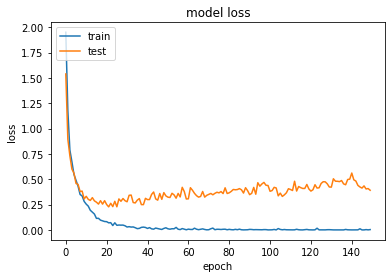

In [52]:
import matplotlib.pyplot as plt
# Plot training & test accuracy values 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables with Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.

### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (```model.reset_states()```), otherwise the training just continues from where it was stopped earlier.

* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
    * *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.

* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.

* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

    <span style="color:red"> <*In the three optimizers that I chose,rmsprop, 0.25 dropout and 150 epoch is the best model, with an accuracy of 0.940625. They medium is the model with optimizer adam, 0 dropout and 150 epochs. Its accuracy is 0.9328. The worst is the model with optimizer sgd, 0 dropout and 150 epochs.  *> </span>


* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?

    <span style="color:red"> <*Yes, and I split the training set into training and validiation*> </span>


## Further information
For ideas about hyper-parameter tuning, take a look at the strategies described in the sklearn documentation under [model selection](https://scikit-learn.org/stable/model_selection.html), or in this [blog post](https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html) from TensorFlow. For a more thorough discussion about optimizers see [this video](https://www.youtube.com/watch?v=DiNzQP7kK-s) discussing the article [Descending through a Crowded Valley -- Benchmarking Deep Learning Optimizers](https://arxiv.org/abs/2007.01547).


**Good luck!**